# Evaluation of Sales Strategies for the New Product Line: Performance Analysis and Recommendations

## Introduction

In the dynamic world of sales, identifying the most effective sales strategies is essential for maximizing revenue and optimizing resource allocation. For any company, selecting the right approach for selling a new product line can significantly impact overall sales performance and customer satisfaction.

This report focuses on evaluating the effectiveness of three distinct sales strategies employed for a newly launched product line: targeted emails, phone calls, and a combination of both. The goal is to analyze the performance of each strategy in terms of customer reach, revenue distribution, and temporal sales variations. By doing so, we aim to determine which strategy offers the best return on investment and provides actionable insights for future sales efforts.

The following sections will cover the validation and cleaning of the provided data, exploratory analysis to answer key business questions, and the definition of a relevant metric to monitor sales performance. The report will conclude with recommendations based on the analysis to guide the company in refining their sales strategies and achieving better outcomes.

# 1. Data Validation

### Overview

The dataset initially contained 15,000 rows and 8 columns. The following validation and cleaning steps were undertaken to ensure the accuracy and completeness of the data:

### Summary of Validation and Cleaning Steps

1. **Week**
   - **Values:** 1 to 6 (6 unique values).
   - **Status:** No missing values or cleaning needed.

2. **sales_method**
   - **Original Values:** 5 unique methods, with inconsistencies such as "email" vs. "Email" and "em + call" vs. "email + call".
   - **Cleaning:** Corrected typos and merged similar methods, resulting in 3 unique values. No missing values.

3. **customer_id**
   - **Values:** 1,500 unique alphanumeric IDs.
   - **Status:** All IDs were unique and correctly stored as "object" data type. No missing values or cleaning needed.

4. **nb_sold**
   - **Original Values:** Ranging from 7 to 16 (10 unique values).
   - **Status:** Initially stored as "object" but converted to integers for analysis. No missing values.

5. **revenue**
   - **Original Values:** 6,743 unique values, rounded to 2 decimal places.
   - **Issues:** 1,074 missing values.
   - **Cleaning:** Removed rows with missing revenue values, as all records with `nb_sold` had corresponding revenue. Remaining rows: 13,926.

6. **years_as_customer**
   - **Values:** Ranging from 0 to 63 (42 unique values).
   - **Issues:** The maximum possible value should be 38 years, assuming the data was updated until 2022.
   - **Cleaning:** Removed rows with values above 38 years. Remaining rows: 13,922.

7. **nb_site_visits**
   - **Values:** Ranging from 12 to 37 (26 unique values).
   - **Status:** Data type is integer and correct. No cleaning needed.

8. **state**
   - **Values:** 50 unique US states.
   - **Status:** All values are correctly formatted as text strings. No cleaning needed.

### Summary

After the data validation and cleaning process, the dataset was reduced to 13,922 rows while maintaining 8 columns.

In [1]:
# Importing necessary libraries
import pandas as pd                 # For data manipulation and analysis
import numpy as np                  # For numerical operations and handling arrays
import matplotlib.pyplot as plt     # For creating static, animated, and interactive visualizations
import seaborn as sns               # For statistical data 
import statistics                   # For calculating mathematical statistics of numeric data
import scipy.stats as stats         # The statistics module from SciPy for advanced statistical functions

## Data Overview

In [2]:
# Load the dataset
df = pd.read_csv("product_sales.csv")

# Display the shape of the dataframe to understand its dimensions
print(df.shape)

# Show the first few rows of the dataframe to get a glimpse of the data
df.head()

(15000, 8)


week  sales_method  ... nb_site_visits      state
0     2         Email  ...             24    Arizona
1     6  Email + Call  ...             28     Kansas
2     5          Call  ...             26  Wisconsin
3     4         Email  ...             25    Indiana
4     3         Email  ...             28   Illinois

[5 rows x 8 columns]

The dataset was loaded into a pandas DataFrame from the CSV file `product_sales.csv`.

- **Shape of the DataFrame:** The dataset comprised 15,000 rows and 8 columns. This provided an overview of the dataset's size and the number of features available for analysis.

- **Initial Data Preview:** The first few rows of the dataset were displayed to understand the structure and content of the data. This included checking column names and initial values to get a preliminary sense of the dataset

### Unique Values

The number of unique values in each column was determined to understand the diversity of the data:

In [3]:
# To check unique values
print(f"{'Column Name':<20} {'Unique Values':<15}")
print("-" * 35)
for column in df.columns:
    print(f"{column:<20} {df[column].nunique():<15}")

Column Name          Unique Values  
-----------------------------------
week                 6              
sales_method         5              
customer_id          15000          
nb_sold              10             
revenue              6743           
years_as_customer    42             
nb_site_visits       27             
state                50             


This overview helped in assessing the variability within each feature and identifying columns that required further examination or cleaning.

In [4]:
# To check missing values
missing_values = df.isnull().sum()

# Print in a formatted table
print(f"{'Column Name':<20} {'Missing Values':<15}")
print("-" * 35)
for column, missing in missing_values.items():
    print(f"{column:<20} {missing:<15}")

Column Name          Missing Values 
-----------------------------------
week                 0              
sales_method         0              
customer_id          0              
nb_sold              0              
revenue              1074           
years_as_customer    0              
nb_site_visits       0              
state                0              


The revenue column was found to have 1,074 missing entries. This indicated that some sales data lacked associated revenue figures, which needed to be addressed during the data cleaning process.

### Checking the `week` Column

To verify the unique values in the `week` column and ensure they fall within the expected range, I sorted and displayed the unique values:

In [5]:
# Checking unique values in the 'week' column
print(sorted(df["week"].unique()))

[1, 2, 3, 4, 5, 6]


This confirmed that the `week` column contained six distinct values, ranging from 1 to 6, which aligned with the expected range and indicated that no data cleaning was needed for this column.

### Checking the `sales_method` Column

To ensure the `sales_method` column contains valid and consistent entries, I sorted and displayed the unique values:

In [6]:
# Checking unique values in the 'sales_method' column
print(sorted(df["sales_method"].unique()))

['Call', 'Email', 'Email + Call', 'em + call', 'email']


This output revealed that there were variations in the text entries for `sales_method` column. Specifically, 'em + call' and 'email' were inconsistent with other values. These inconsistencies had to be addressed by standardizing the values to ensure accurate analysis.

### Standardizing the `sales_method` Column

To ensure consistency in the `sales_method` column, I addressed variations in the text entries by standardizing them. Specifically, I replaced inconsistent values with a uniform representation:

In [7]:
# Replacing inconsistent sales methods with standardized values
df["sales_method"] = df["sales_method"].replace("em + call", "Email + Call")
df["sales_method"] = df["sales_method"].str.replace("email", "Email")

# Checking unique values in the 'sales_method' column again
print(df["sales_method"].unique())

['Email' 'Email + Call' 'Call']


This confirmed that the column now contained three distinct and consistent values, which are `Call`, `Email`, and `Email + Call`. This standardization ensured that the data was uniform and would be reliable for subsequent analysis.

### Analyzing the `customer_id` Column

To understand the characteristics of the `customer_id` column, I evaluated the following aspects:

1. **Total Number of `customer_id`:** The total count of `customer_id` entries in the dataset.
2. **Number of Unique `customer_id`:** The count of distinct `customer_id` values.
3. **Data Type of `customer_id`:** The data type of the `customer_id` column.

In [8]:
# Total number of customer_id
total_customers = len(df["customer_id"])

# Number of unique customer_id
unique_customers = df["customer_id"].nunique()

# Data type of customer_id
customer_id_dtype = str(df["customer_id"].dtype)

# Print results in a formatted table
print(f"{'Metric':<30} {'Value':<15}")
print("-" * 45)
print(f"{'Total number of customer_id':<30} {total_customers:<15}")
print(f"{'Number of unique customer_id':<30} {unique_customers:<15}")
print(f"{'Data type of customer_id':<30} {customer_id_dtype:<15}")

Metric                         Value          
---------------------------------------------
Total number of customer_id    15000          
Number of unique customer_id   15000          
Data type of customer_id       object         


This indicated that each customer_id was unique and that the column was correctly stored as an object data type to accommodate alphanumeric identifiers.

### Checking the `nb_sold` Column

To analyze the `nb_sold` column, I reviewed the unique values and checked its data type:

1. **Unique Values in `nb_sold`:** I sorted and displayed the unique values to understand the range of the number of products sold.

2. **Data Type of `nb_sold`:** I verified the data type to ensure it was appropriate for numerical analysis.

In [9]:
# Checking unique values in the 'nb_sold' column
print(sorted(df["nb_sold"].unique()))

# Data type of nb_sold
nb_sold_dtype = df["nb_sold"].dtype
print("Data type of nb_sold: ", nb_sold_dtype)

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Data type of nb_sold:  int64


This indicated that the `nb_sold` column contained integer values within the expected range, and the data type was correctly set as int64 for numerical operations.

### Converting and Verifying the `nb_sold` Column

To ensure the `nb_sold` column was properly formatted as an integer, I converted its data type and then verified the conversion:

1. **Conversion to `int64`:** I converted the `nb_sold` column to the `int64` data type to ensure consistency and appropriateness for numerical analysis.

2. **Verification:** I confirmed the data type and displayed the sorted unique values to ensure the conversion was successful and the values remained consistent.

In [10]:
# Convert nb_sold column to int64 data type
df["nb_sold"] = df["nb_sold"].astype("int64")

# Data type of nb_sold after conversion
nb_sold_dtype = df["nb_sold"].dtype
print("Data type of nb_sold: ", nb_sold_dtype)

# Checking unique values in the 'nb_sold' column after conversion
print(sorted(df["nb_sold"].unique()))

Data type of nb_sold:  int64
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


This confirmed that the nb_sold column was correctly formatted as int64 and the unique values remained consistent with the expected range.

### Checking the `revenue` Column

To assess the `revenue` column, I reviewed its data type to ensure it is suitable for the numerical data it contains:

1. **Data Type of `revenue`:** I checked the data type to confirm it is appropriately set for handling floating-point numbers.


In [11]:
# Data type of revenue
revenue_dtype = df["revenue"].dtype
print("Data type of revenue: ", revenue_dtype)

Data type of revenue:  float64


This indicated that the `revenue` column was correctly formatted as float64, which is appropriate for handling monetary values with decimal places.

### Inspecting Missing Values in the `revenue` Column

To understand the extent and context of missing values in the `revenue` column, I identified and reviewed the rows with null values:

1. **Identifying Missing Values:** I filtered the dataset to extract rows where the `revenue` column had null values. This helped in understanding the distribution and possible reasons for missing data.

In [12]:
# Extract rows with missing values in the 'revenue' column
null_revenue = df[df['revenue'].isnull()]
null_revenue

week  sales_method  ... nb_site_visits         state
0         2         Email  ...             24       Arizona
3         4         Email  ...             25       Indiana
16        2         Email  ...             30  Pennsylvania
17        6  Email + Call  ...             24     Wisconsin
28        5         Email  ...             32       Florida
...     ...           ...  ...            ...           ...
14951     5          Call  ...             25      Virginia
14957     1          Call  ...             23      Illinois
14970     4  Email + Call  ...             25    Washington
14992     5  Email + Call  ...             34      New York
14999     5  Email + Call  ...             25      Illinois

[1074 rows x 8 columns]

The above are the returned rows from the dataset where the revenue value is missing. Reviewing these rows allowed me to determine if there are any patterns or specific cases contributing to the missing data.

### Handling Missing Values in the `revenue` Column

I identified that missing values in the `revenue` column were not due to customers not making a purchase, but rather due to incomplete data entries. Therefore, I removed the rows with missing `revenue` values to ensure accuracy in my analysis.

1. **Removing Rows with Missing `revenue`:** I dropped all rows where the `revenue` value was missing, as these entries accounted for less than 15% of the`sales_method` categories

2. **Summary of `revenue` Column:** After removing rows with missing values, I calculated the total number of entries and the number of unique revenue values to understand the dataset's current state.

In [13]:
# Remove rows with missing 'revenue' values
df = df.drop(df[df['revenue'].isna()].index)

# Total number of 'revenue' entries after cleaning
total_revenue = len(df["revenue"])

# Number of unique 'revenue' values after cleaning
unique_revenue = df["revenue"].nunique()

print("Total number of revenue: ", total_revenue)
print("Number of unique revenue: ", unique_revenue)

Total number of revenue:  13926
Number of unique revenue:  6743


This indicated that the dataset now includes 13,926 entries with 6,743 unique revenue values, reflecting a cleaned and more accurate dataset for analysis.

### Counting Total Rows After Cleaning

To get an updated view of the dataset's size after performing data cleaning, I counted the number of rows remaining:

1. **Counting Total Rows:** I determined the total number of rows in the dataset to understand the dataset size after removing entries with missing values.

In [14]:
# Count the total number of rows remaining in the dataset
total_rows = df.shape[0]
total_rows

13926

This reflected the size of the dataset after removing rows with missing `revenue` values, ensuring that all remaining data was complete and ready for analysis.

### Checking the `years_as_customer` Column

To ensure the `years_as_customer` column was appropriately formatted and contained expected values, I reviewed its data type and unique values:

1. **Data Type of `years_as_customer`:** I checked the data type to ensure it was suitable for numerical values.

2. **Unique Values in `years_as_customer`:** I examined the unique values to confirm they were within the expected range, considering the company's founding year and the maximum possible number of years.

In [15]:
# Data type of 'years_as_customer'
years_as_customer_dtype = df["years_as_customer"].dtype
print("Data type of years_as_customer: ", years_as_customer_dtype)

# Unique values in 'years_as_customer'
print(sorted(df["years_as_customer"].unique()))

Data type of years_as_customer:  int64
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 47, 63]


The years_as_customer column was correctly formatted as int64, and the unique values ranged from 0 to 63. Given that the company was founded in 1984 and assuming data was up to 2022, the maximum possible value should have been around 38. I, therefore, needed to address any values that exceeded this expected range

### Handling Outliers in the `years_as_customer` Column

To ensure the `years_as_customer` data is within a plausible range, I identified and removed rows where the value exceeded the expected maximum of 38 years. This adjustment was necessary because any value above this threshold likely indicates incorrect or outdated data.

1. **Removing Outliers:** I removed rows where the `years_as_customer` value was greater than 38.

2. **Reviewing the Updated Data:** After removing outliers, I checked the remaining unique values to confirm the adjustments were applied correctly.

In [16]:
# Remove rows where 'years_as_customer' is greater than 38
df.drop(df[df["years_as_customer"] > 38].index, inplace=True)

# Display unique values in 'years_as_customer' after cleaning
print(sorted(df["years_as_customer"].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]


After the removal of outliers, the years_as_customer column now contained values ranging from 0 to 38, aligning with the expected data range and ensuring the dataset's integrity for further analysis.

### Counting Total Rows After Removing Outliers

After cleaning the dataset by removing rows with `years_as_customer` values greater than 38, I counted the number of rows remaining to understand the current size of the dataset.

In [17]:
# Count the total number of rows remaining in the dataset
total_rows = df.shape[0]
total_rows

13922

This reflected the size of the dataset after removing outliers in the years_as_customer column, confirming that the data was now within a reasonable range for analysis.

### Checking the `nb_site_visits` Column

To ensure the `nb_site_visits` column is appropriately formatted and contains expected values, I reviewed its data type, unique values, and the number of unique entries.

1. **Data Type of `nb_site_visits`:** I checked the data type to ensure it was an integer, which is suitable for representing counts.

2. **Unique Values in `nb_site_visits`:** I examined the unique values to confirm they fell within a reasonable range.

3. **Number of Unique Entries:** I counted the number of unique values to understand the diversity in `nb_site_visits`.

In [18]:
# Data type of 'nb_site_visits'
nb_site_visits_dtype = df["nb_site_visits"].dtype
print(f"Data type of 'nb_site_visits': {nb_site_visits_dtype}")

# Unique values in 'nb_site_visits'
unique_nb_site_visits = sorted(df["nb_site_visits"].unique())
print(f"Unique values in 'nb_site_visits': {unique_nb_site_visits}")

# Number of unique 'nb_site_visits'
num_unique_nb_site_visits = df["nb_site_visits"].nunique()
print(f"Number of unique 'nb_site_visits': {num_unique_nb_site_visits}")

Data type of 'nb_site_visits': int64
Unique values in 'nb_site_visits': [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
Number of unique 'nb_site_visits': 26


The `nb_site_visits` column was correctly formatted as int64, and the unique values ranged from 12 to 37, with 26 distinct values. This indicated a well-distributed range of site visits across customers, with no additional cleaning needed for this column.

### Checking the `state` Column

I assessed the `state` column to ensure it was properly formatted and contained expected values. This involved checking its data type, listing unique states, and counting the number of unique states.

In [19]:
# Data type of 'state'
state_dtype = df["state"].dtype
print(f"Data type of 'state': {state_dtype}")

# Unique values in 'state'
unique_states = sorted(df["state"].unique())
print(f"Unique states in 'state': {unique_states}")

# Number of unique 'state'
num_unique_states = df["state"].nunique()
print(f"Number of unique states: {num_unique_states}")

Data type of 'state': object
Unique states in 'state': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
Number of unique states: 50


The state column had a data type of object (string), with 50 unique values corresponding to all US states. This indicated that the column was correctly formatted and contained comprehensive state information without any anomalies.

### Checking the Dimensions of the DataFrame

After performing the necessary data validation and cleaning steps, I needed to verify the final dimensions of the DataFrame to ensure that it was ready for further analysis.

In [20]:
# Check the total number of rows and columns in the DataFrame after cleaning
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 13922
Number of columns: 8


The DataFrame now contained 13,922 rows and 8 columns, indicating that the data had been cleaned and prepared for subsequent analysis.

# 2. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) was a critical step in understanding the underlying patterns and characteristics of the dataset. The primary objective of EDA was to uncover insights that inform my analysis and decision-making processes. For this project, EDA involved examining the distribution of key variables, exploring relationships between different features, and identifying any potential trends or anomalies that could impact the sales strategies.

In this section, I:

1. **Analyzed the Distribution of Key Variables**: I investigated the distribution of important variables such as `nb_sold`, `revenue`, and `years_as_customer` to understand their ranges and central tendencies.

2. **Examined Relationships Between Features**: By exploring how different features interacted with each other, I aim edto identify significant patterns and correlations that may influence sales outcomes.

3. **Visualized the Data**: I used various graphical methods to visualize the distribution of individual variables and the relationships between multiple variables. This helped ,e to better interpret the data and derive actionable insights.

4. **Identified Trends and Anomalies**: Any unusual trends or anomalies discovered during EDA were noted, as they would affect the effectiveness of the sales strategies or require further investigation.

This analysis provided a solid foundation for developing and evaluating the different sales strategies and guided the recommendations made to the sales team.

## 2.1 Single Variable Analysis

Here, I focused on single-variable analysis to understand the distribution and key statistics of individual features. This included visualizing the distributions and identifying any notable trends or patterns within each variable.

In [21]:
# Calculate the mean of each numerical feature
mean_week = df['week'].mean()
mean_nb_sold = df['nb_sold'].mean()
mean_revenue = df['revenue'].mean()
mean_years_as_customer = df['years_as_customer'].mean()
mean_nb_site_visits = df['nb_site_visits'].mean()

# Calculate the mode of the sales_method and state features
mode_sales_method = df['sales_method'].mode()[0]
mode_state = df['state'].mode()[0]

# Calculate the count of unique customer_id
unique_customer_count = df['customer_id'].nunique()

## Distribution of Weeks

To visualize the distribution of sales across different weeks, I created a histogram of the "week" variable. This histogram provided insights into the frequency of sales activities over the weeks since the product launch.

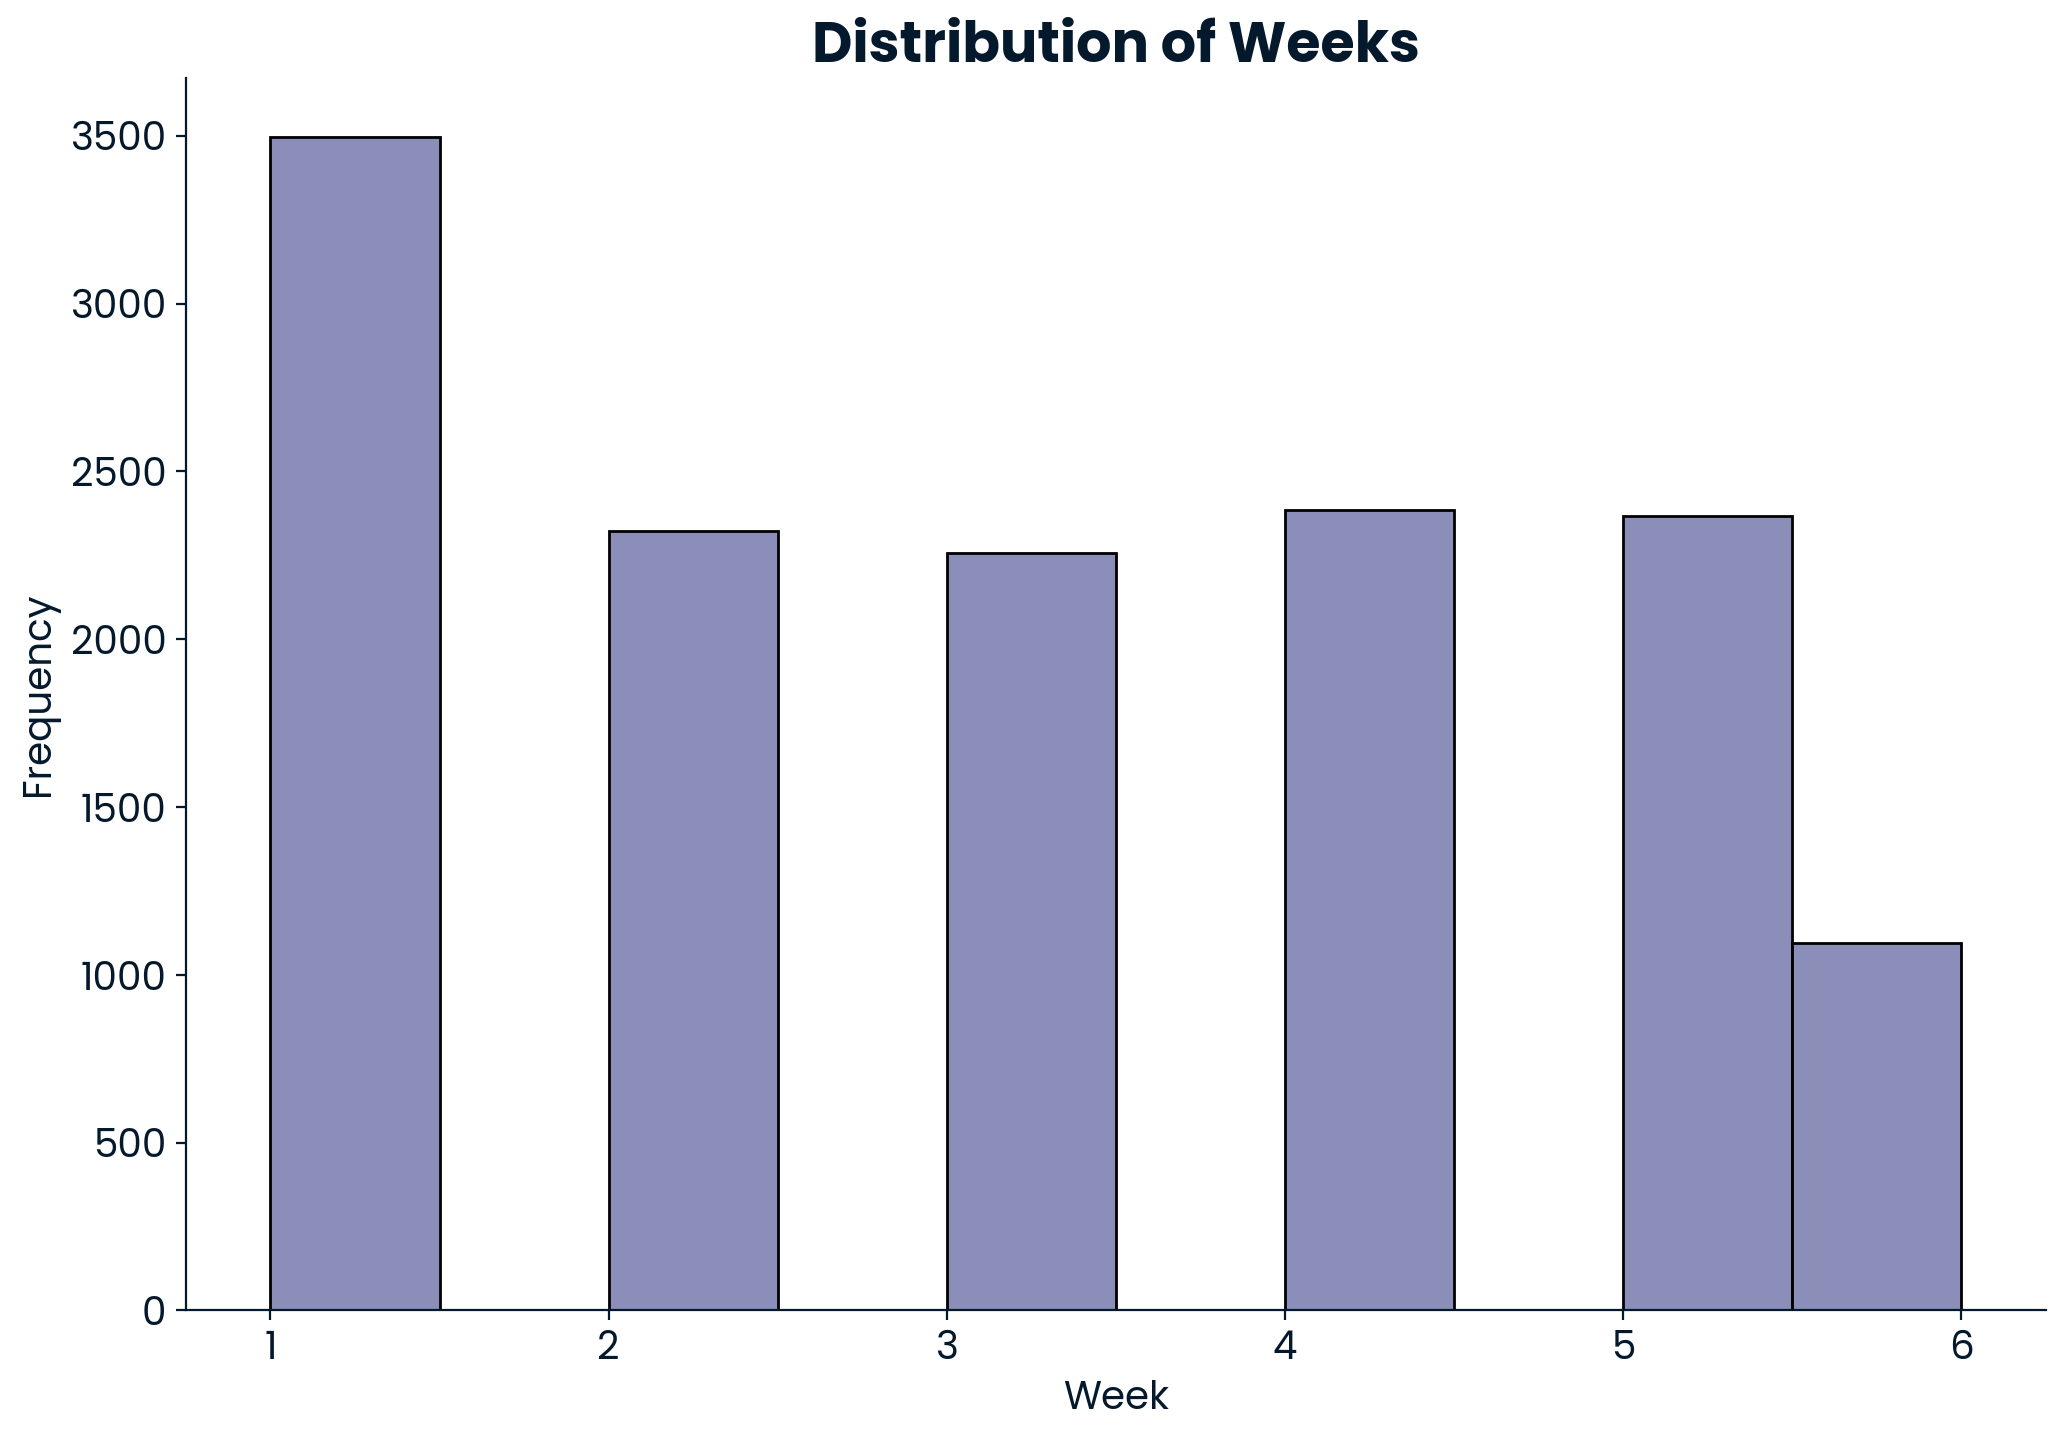

In [22]:
# Create histogram of "week"
plt.figure(figsize=(12, 8))
sns.histplot(df['week'], bins=10, kde=False)
plt.title('Distribution of Weeks', fontsize=20, weight='bold')
plt.xlabel('Week', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.show()

**Findings**:

- The distribution of data across weeks shows a significant peak in week 1, indicating the highest activity or volume during this period. 
- Weeks 2 through 5 have similar distributions, with no significant differences among them. 
- Week 6, however, stands out with the least activity, suggesting a decline as time progresses.

## Sales Method
To analyze the distribution of sales methods used, I created a bar chart of the `sales_method` variable. This chart shows the number of customers who were reached through each sales method.

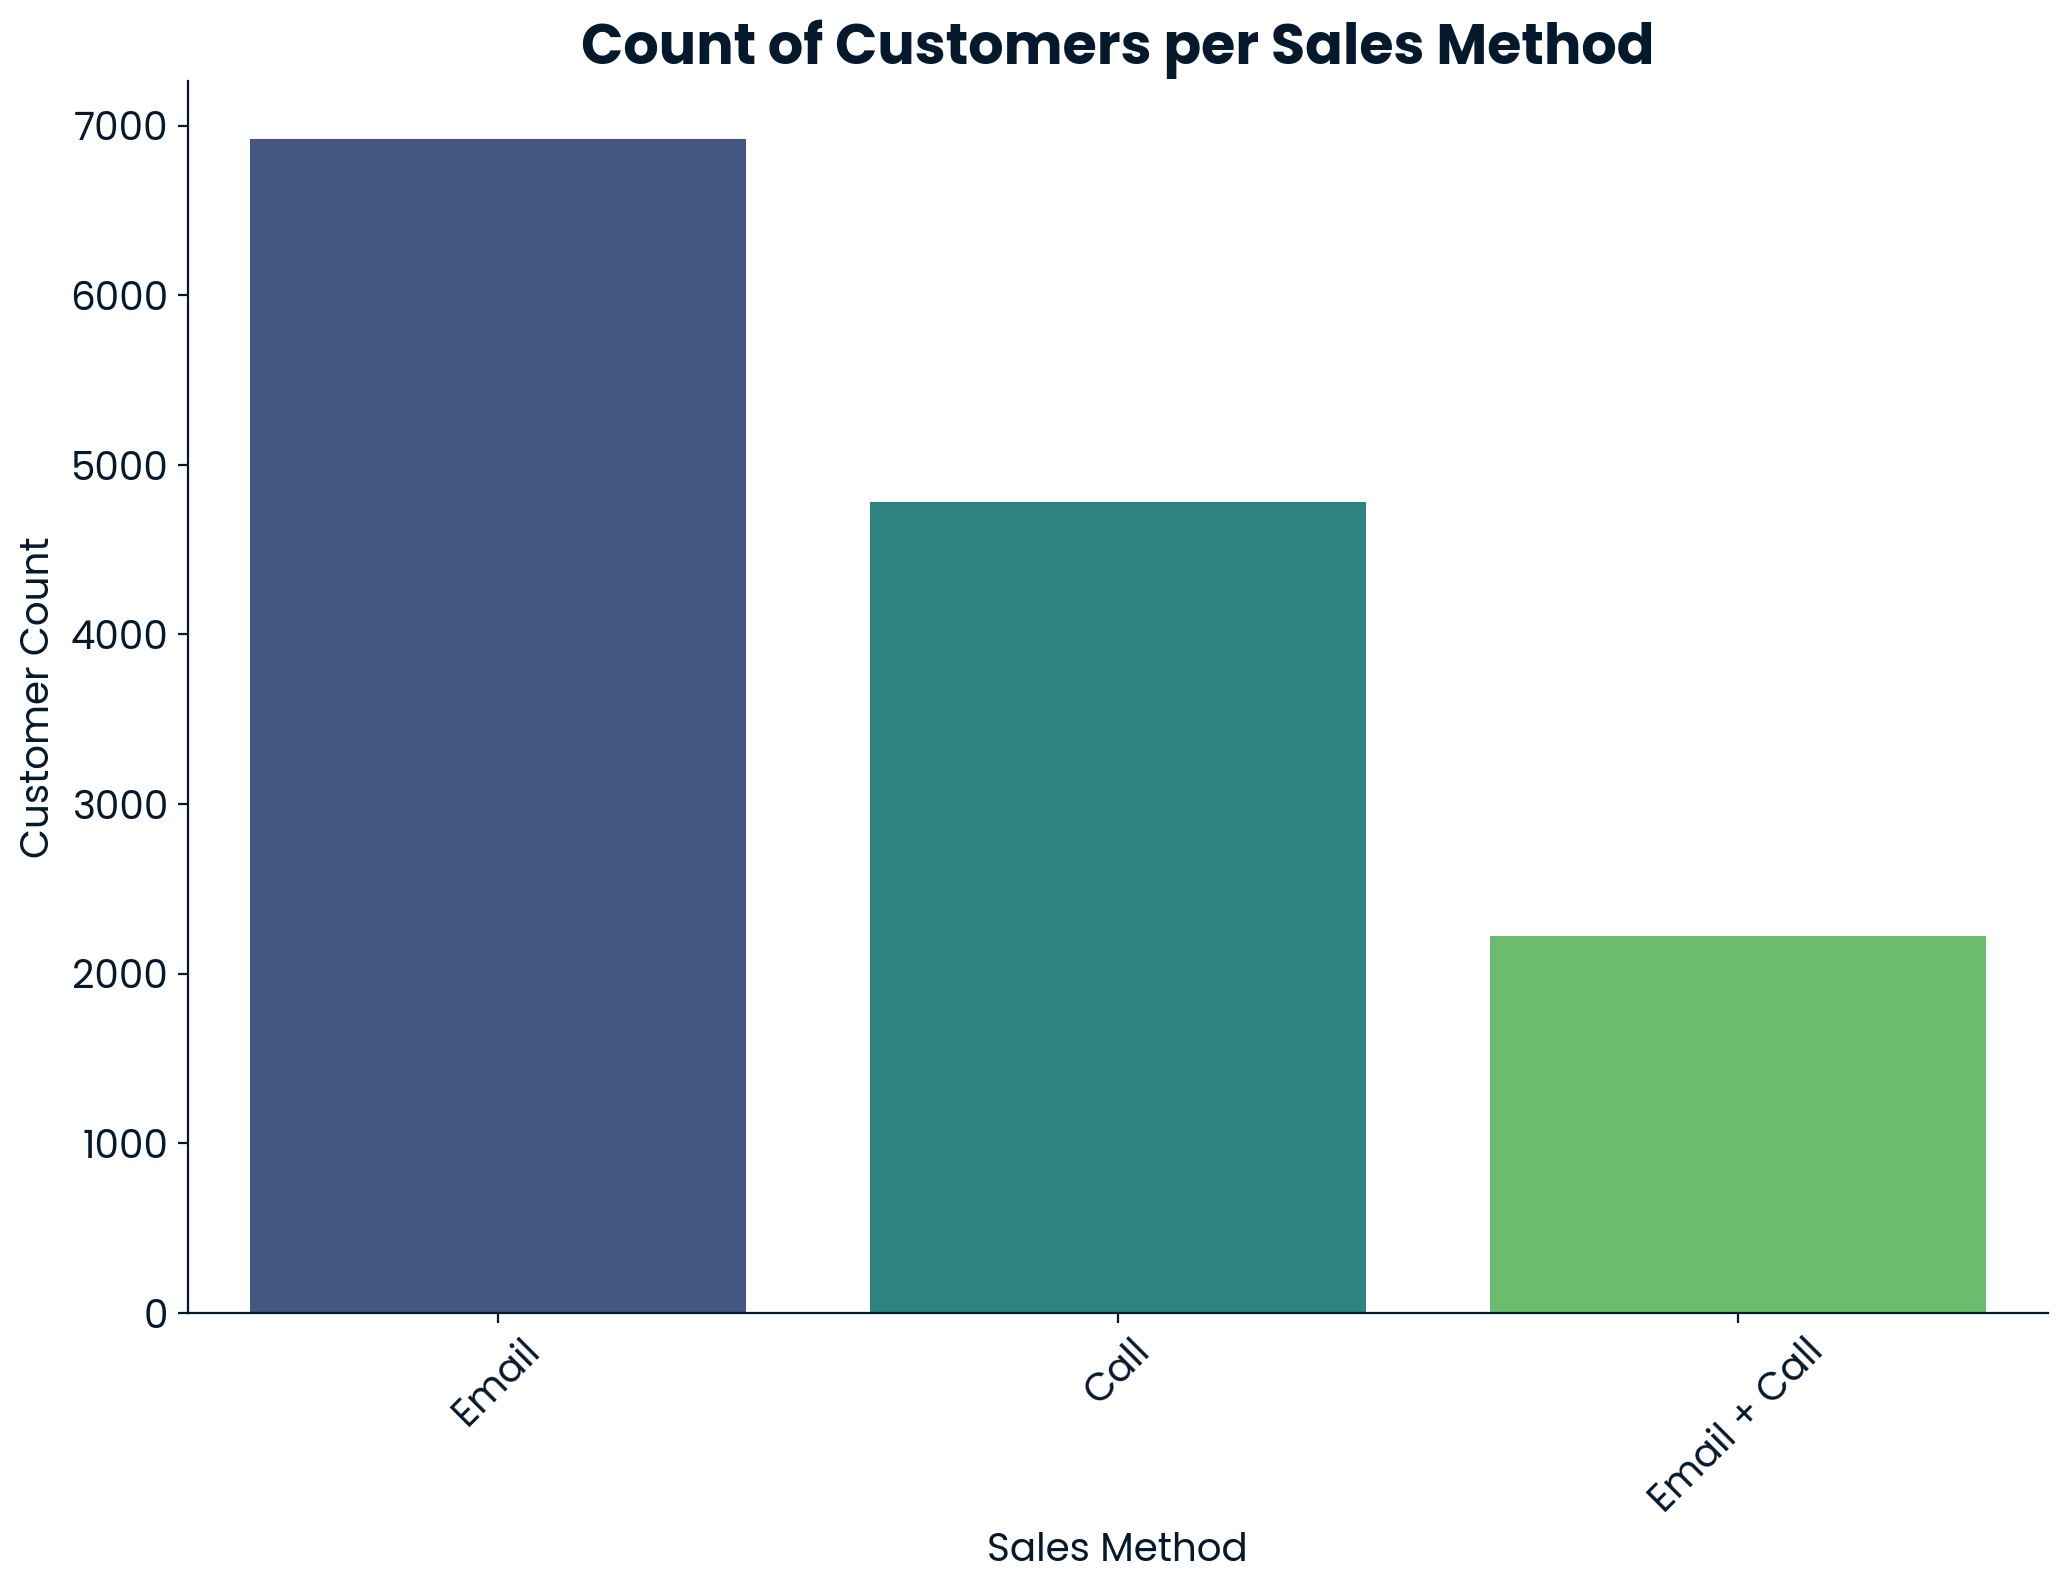

In [23]:
# Create bar chart of "sales_method"
plt.figure(figsize=(12, 8))
sns.countplot(x='sales_method', data=df, order=df['sales_method'].value_counts().index, palette='viridis')
plt.title('Count of Customers per Sales Method', fontsize=20, weight='bold')
plt.xlabel('Sales Method', fontsize=14)
plt.ylabel('Customer Count', fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.show()

**Findings:**

- The distribution of the sales methods data indicates that the "Email" method is the most frequently used, followed by the "Call" method. 
- The "Email + Call" method is used the least. 

- This suggests that the business currently relies more on email communication, possibly due to its lower cost and ease of execution, with the combined approach being less common. 

## Distribution of Number of Products Sold

To understand the distribution of the number of products sold, I created a histogram of the `nb_sold` variable. This histogram provided insights into the frequency of different sales volumes.

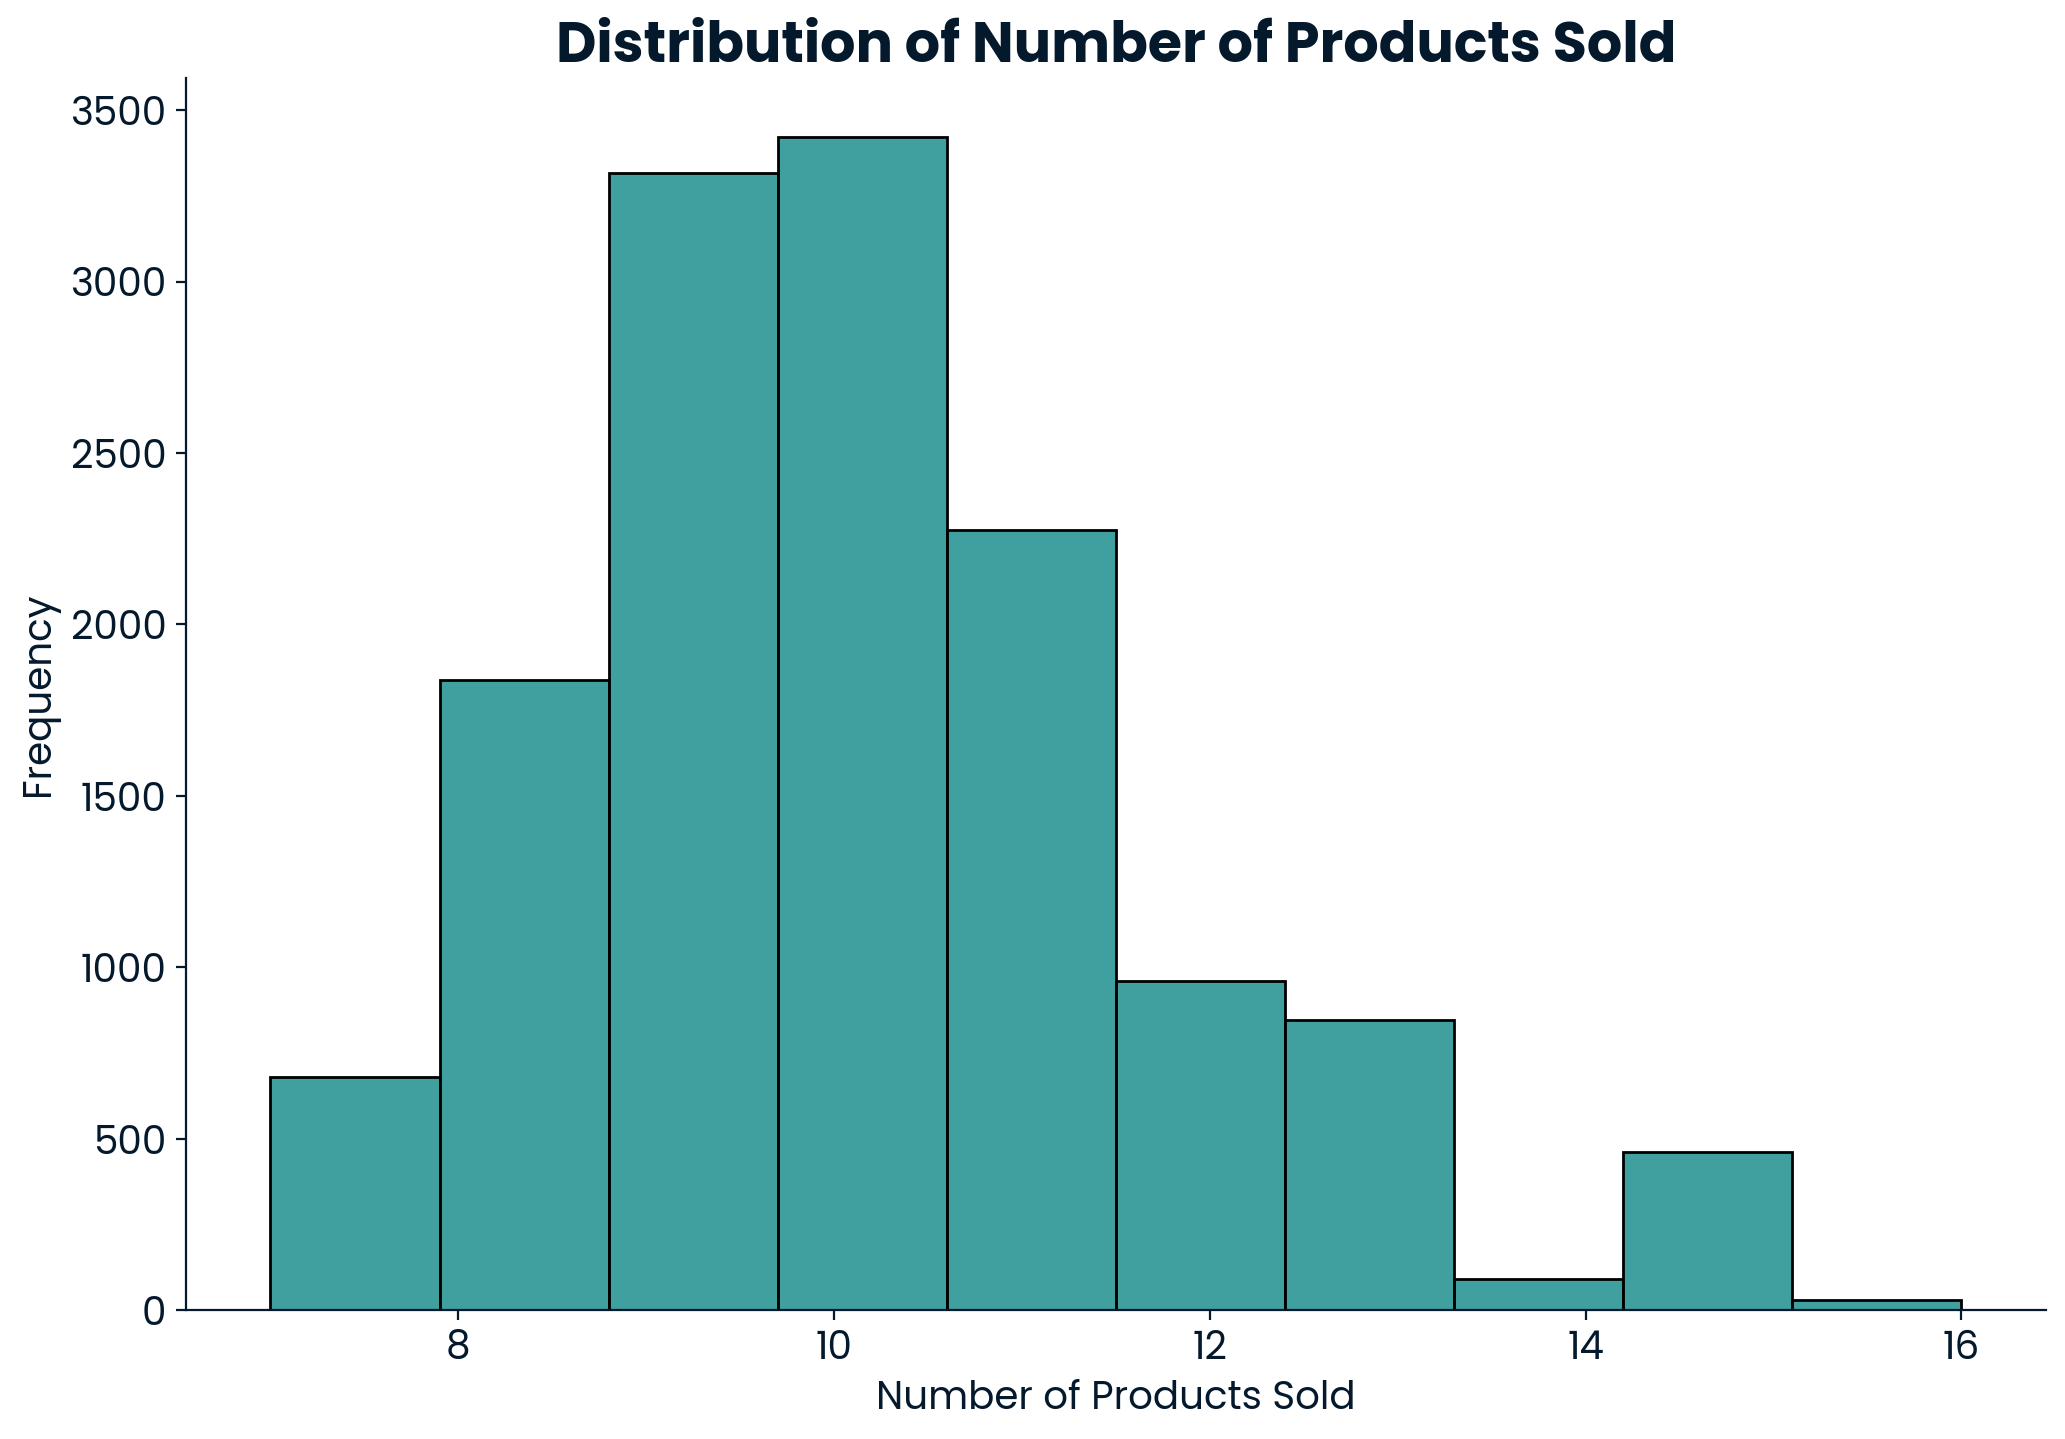

In [24]:
# Create histogram of "nb_sold"
plt.figure(figsize=(12, 8))
sns.histplot(df['nb_sold'], bins=10, kde=False, color='teal')
plt.title('Distribution of Number of Products Sold', fontsize=20, weight='bold')
plt.xlabel('Number of Products Sold', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.show()

**Findings:**

- This histogram helped visualize the range and distribution of products sold, showing how sales were spread across different quantities. 
- The distribution of the number of products sold indicates that most sales occur between 9 and 10 units, which represents the peak of the distribution.
- As the number of products sold increases beyond 10, the frequency decreases, with very few sales reaching 16 units. 

## Distribution of Revenue

I created a box plot of the `revenue` variable to visualize the distribution of revenue values. The box plot helped identify the central tendency, spread, and potential outliers in the revenue data.

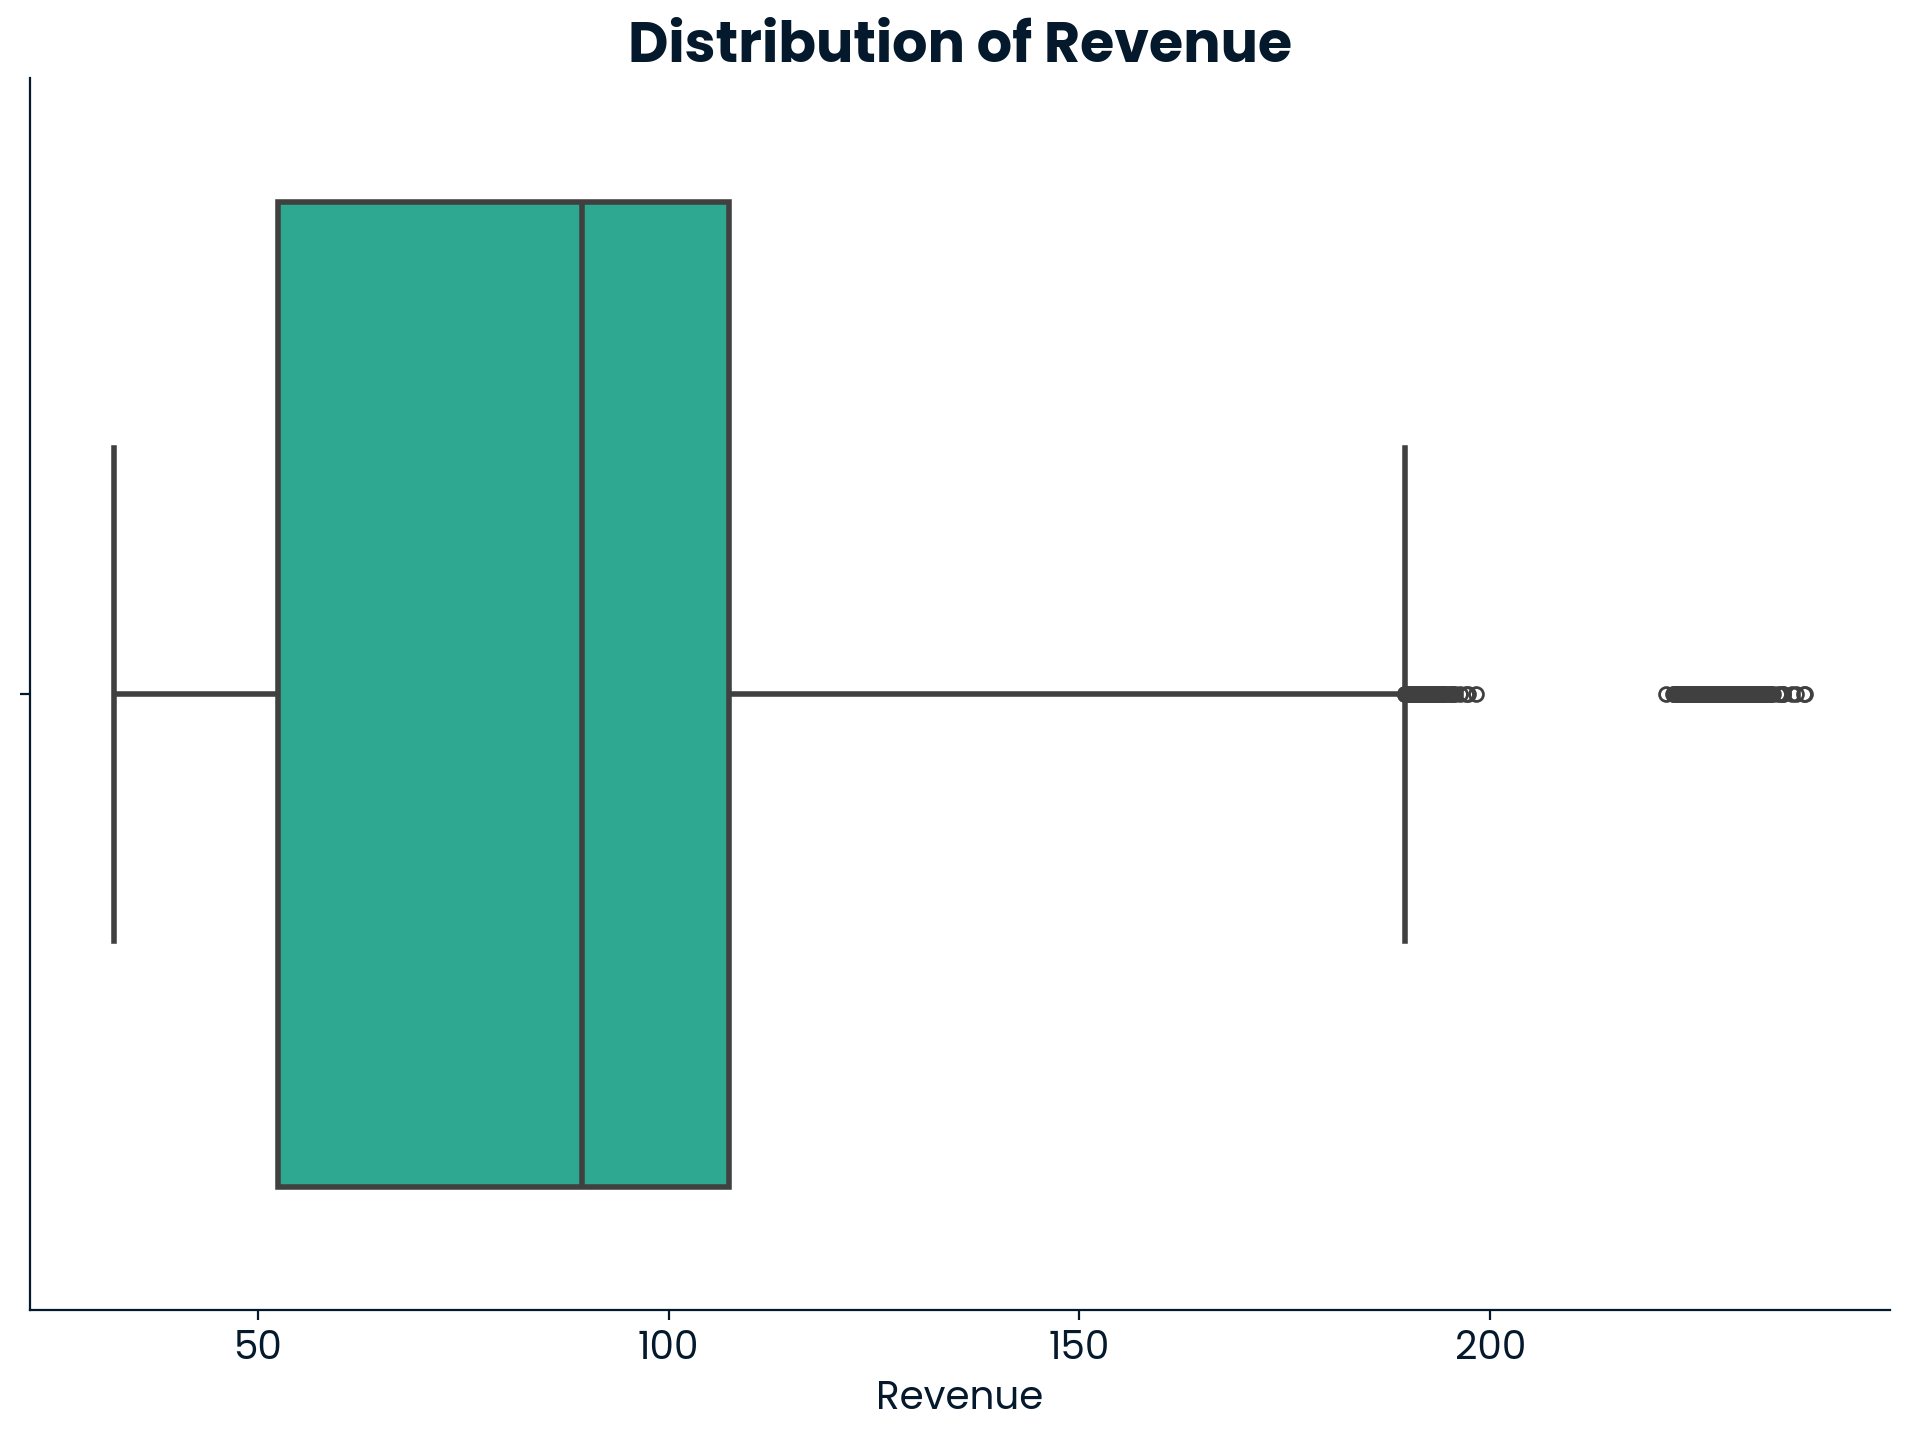

In [25]:
# Create box plot of "revenue"
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['revenue'], color='#1abc9c', linewidth=2, fliersize=5)
plt.title('Distribution of Revenue', fontsize=20, weight='bold')
plt.xlabel('Revenue', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.show()

**Findings:**

- The box plot revealed the spread of revenue values, including the median, quartiles, and potential outliers. 
- This visualization was crucial for understanding the overall revenue distribution and identifying any anomalies or extreme values in the dataset.

## Distribution of Years as Customer

To understand how long customers had been with the company, I created a histogram of the `years_as_customer` variable. This histogram provided insight into the distribution of customer tenure.

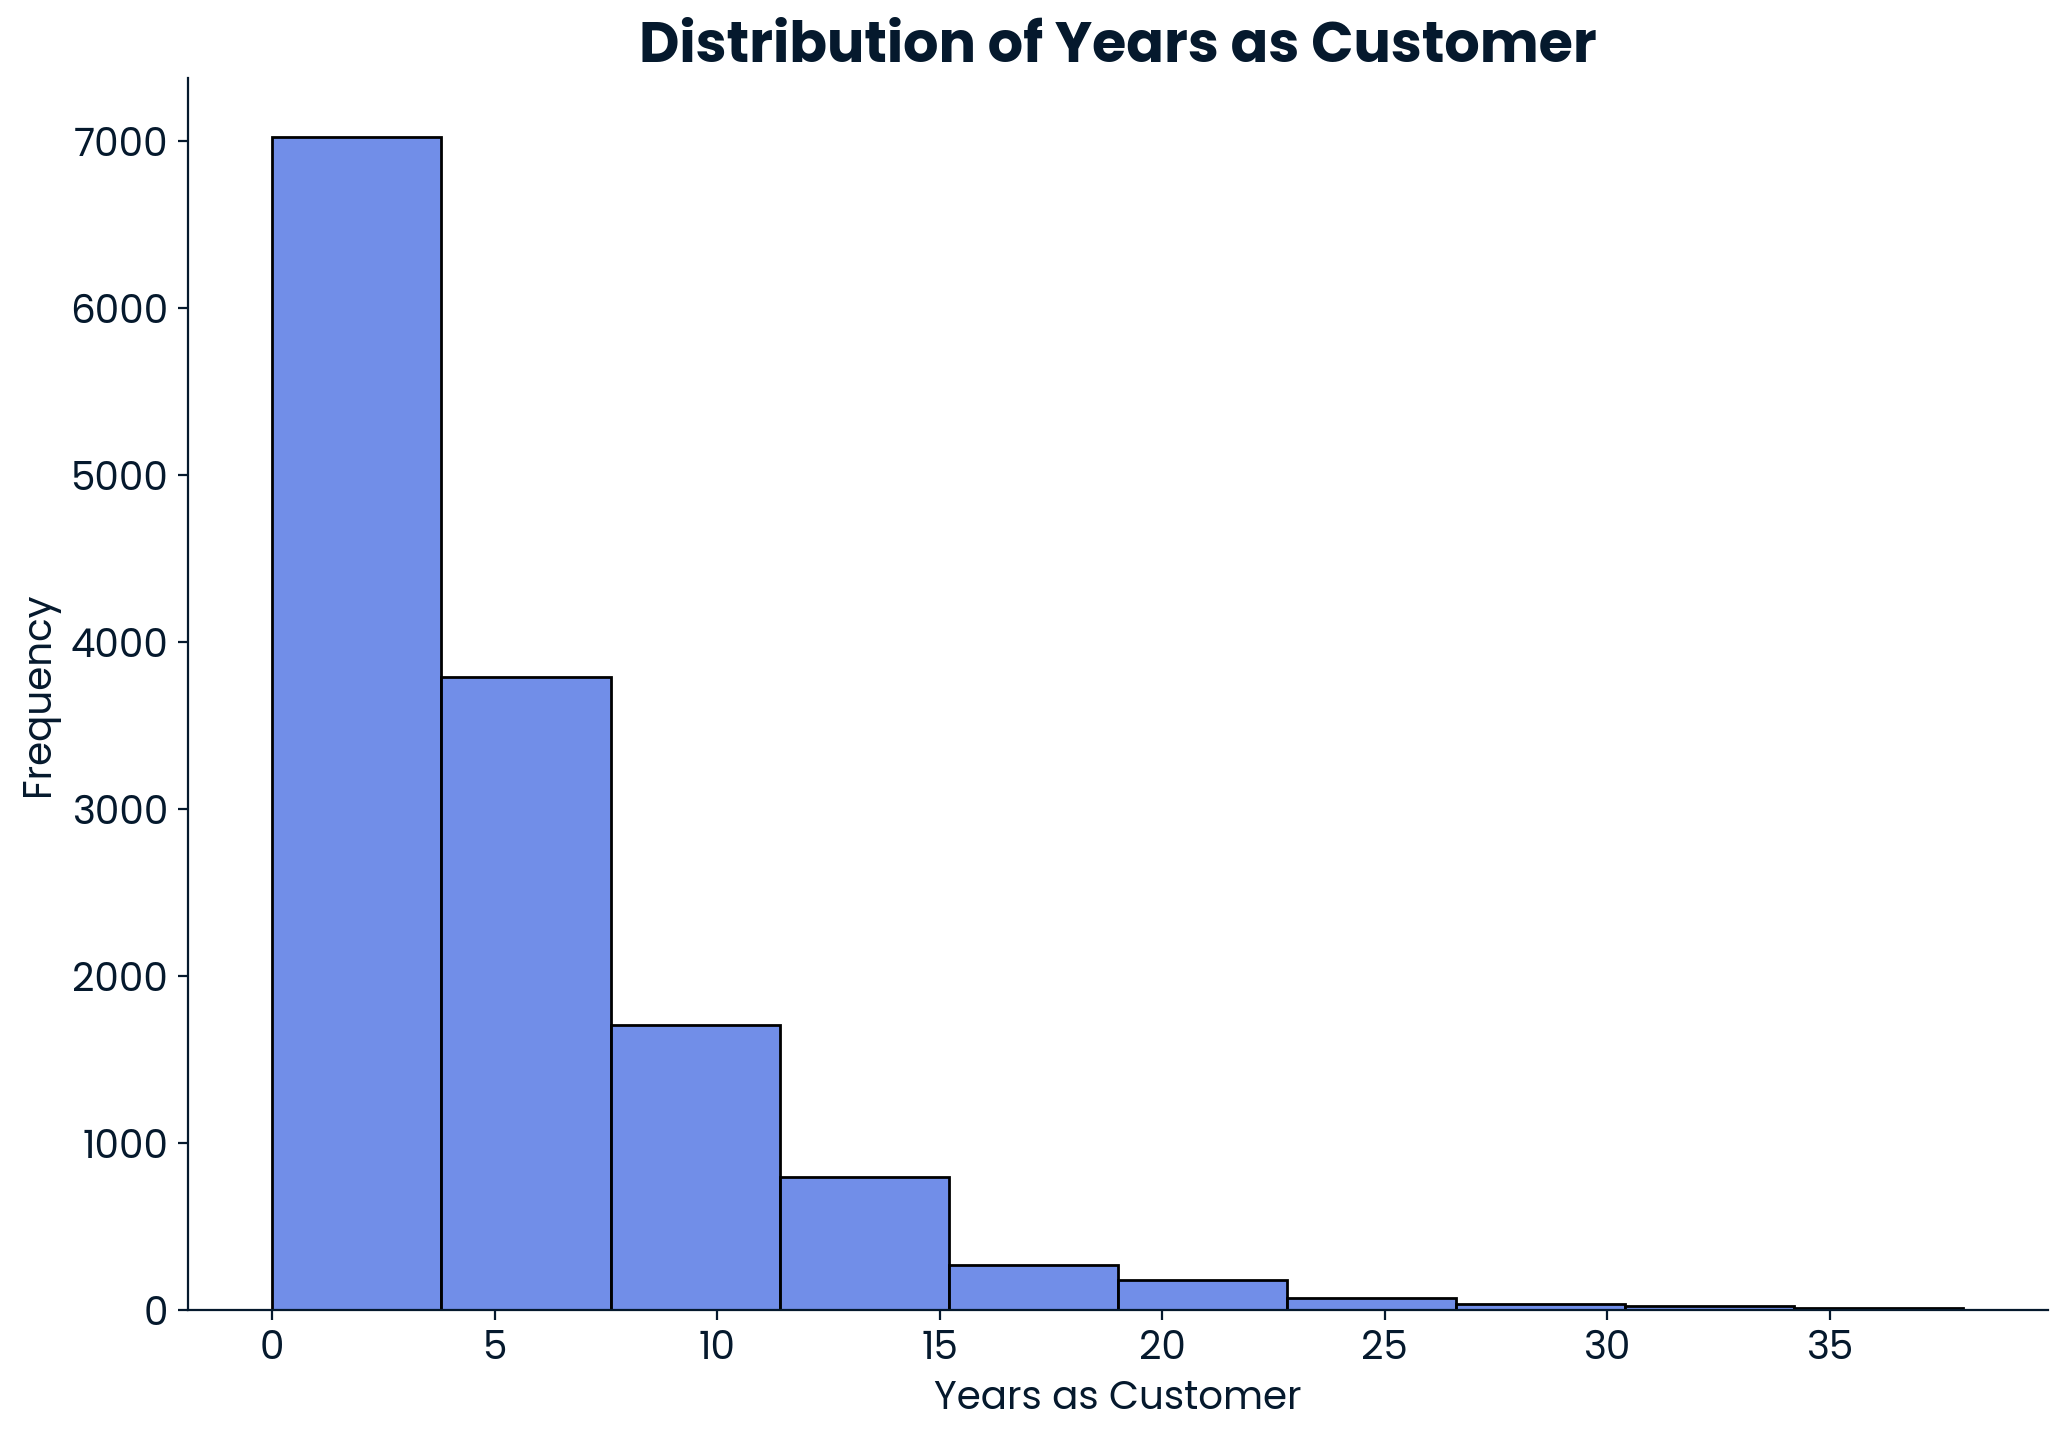

In [26]:
# Create histogram of "years_as_customer"
plt.figure(figsize=(12, 8))
sns.histplot(df['years_as_customer'], bins=10, kde=False, color='royalblue')
plt.title('Distribution of Years as Customer', fontsize=20, weight='bold')
plt.xlabel('Years as Customer', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.show()

**Findings:**

- The histogram illustrates the frequency of different customer tenures, highlighting how many years customers had been with the company. This visualization was essential for understanding customer loyalty and engagement over time.
- As the years increase, the number of customers gradually declines, reaching a lower frequency around 35 years. This suggests that while there is a strong concentration of relatively new customers, long-term customers are less common.

## Distribution of Site Visits

To analyze the variability and detect any potential outliers in the number of site visits by customers, I created a box plot of the `nb_site_visits` variable. This box plot provided a summary of the distribution of site visits, highlighting the median, quartiles, and potential outliers.

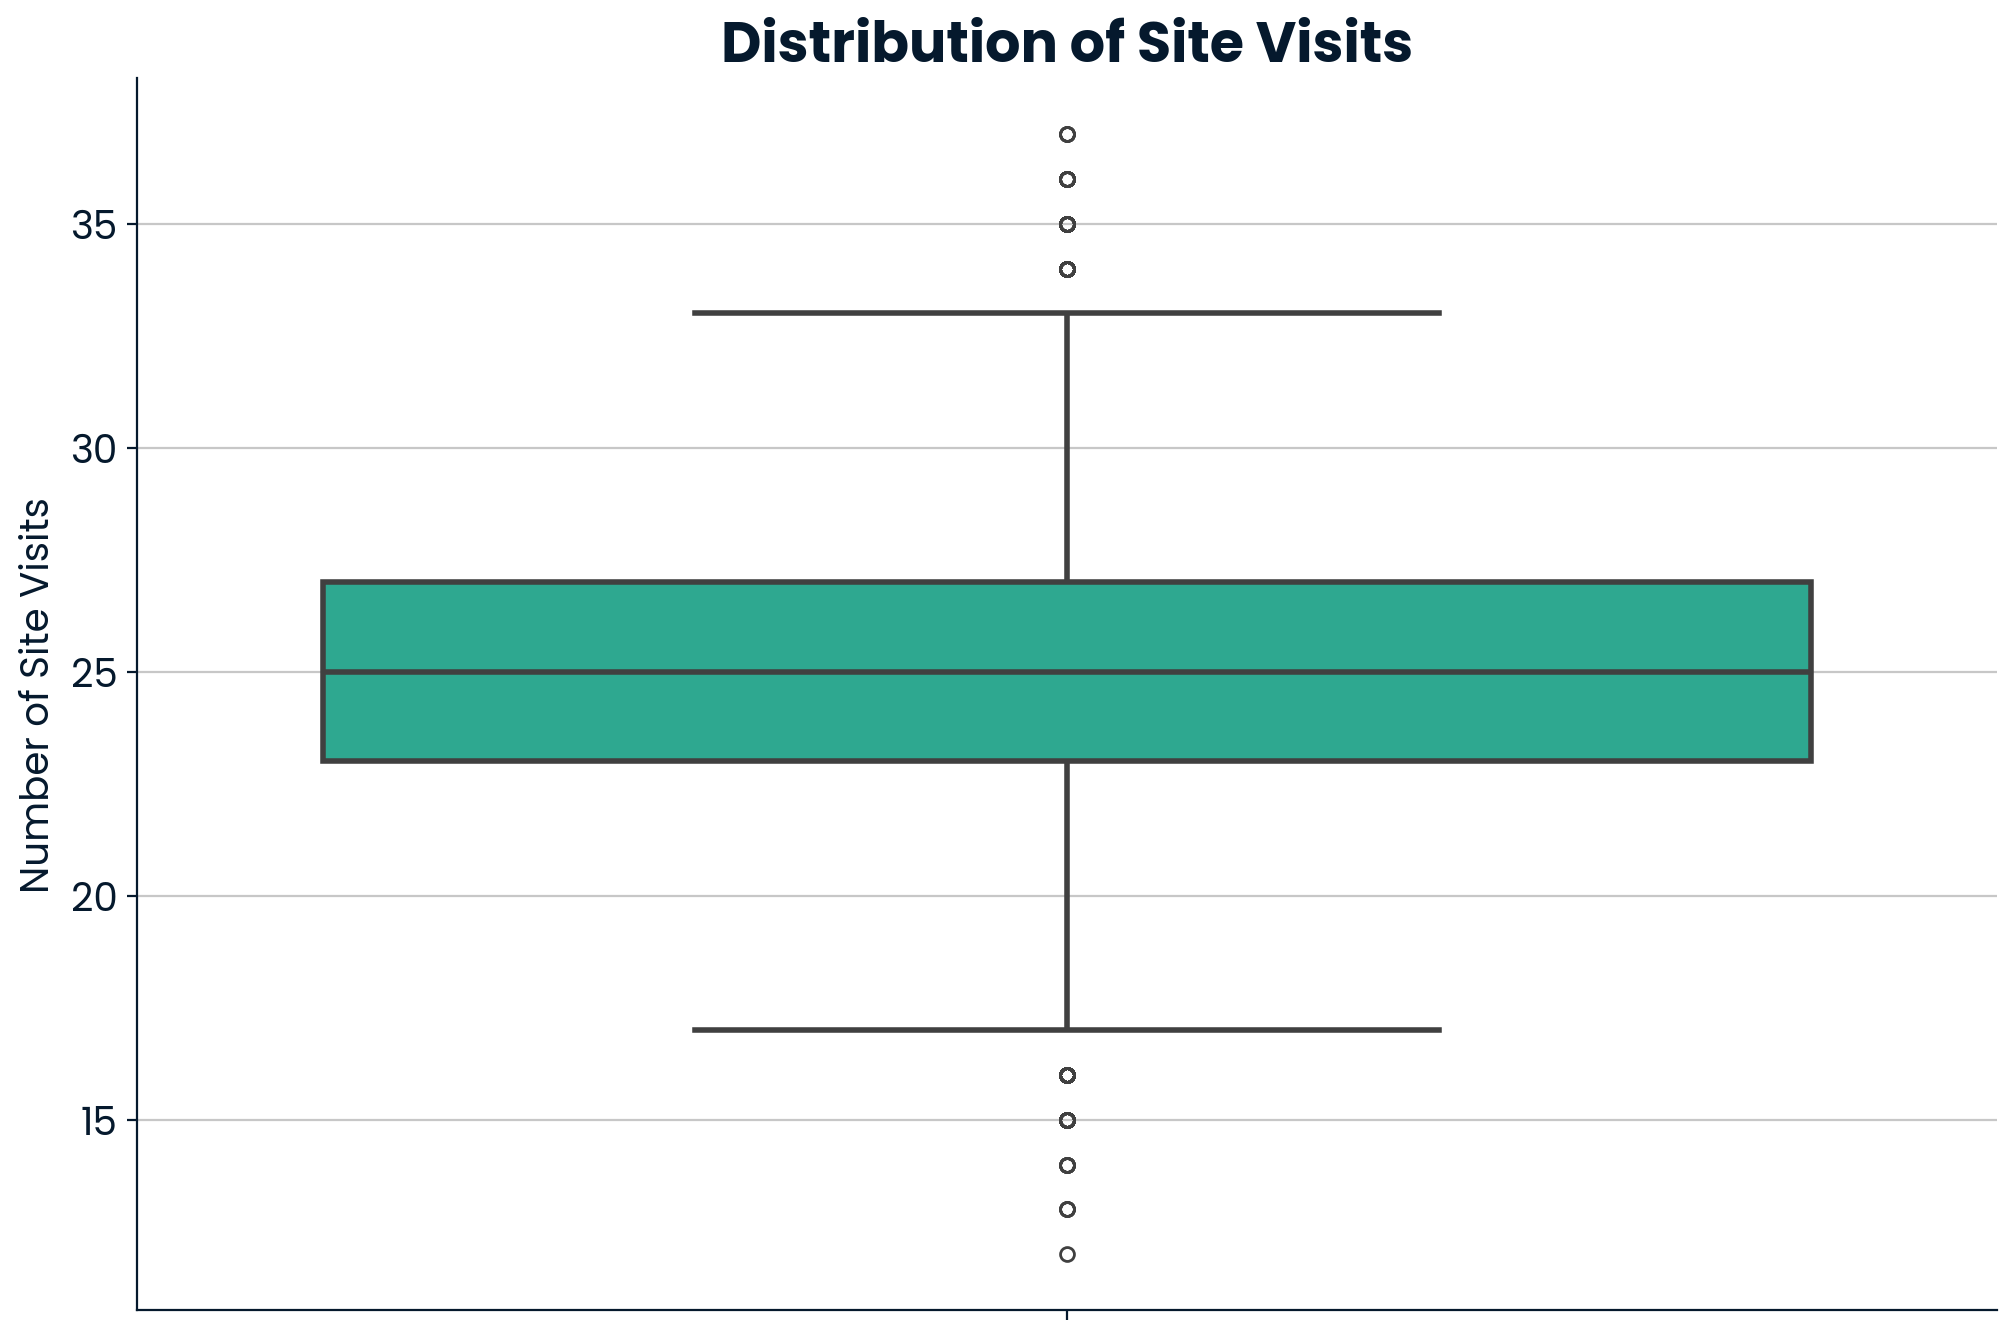

In [27]:
# Create box plot of "nb_site_visits"
plt.figure(figsize=(12, 8))
sns.boxplot(y=df['nb_site_visits'], color='#1abc9c', linewidth=2, fliersize=5)
plt.grid(axis='y', alpha=0.7)
plt.title('Distribution of Site Visits', fontsize=20, weight='bold')
plt.ylabel('Number of Site Visits', fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.show()

**Findings:**

- The box plot shows the spread and central tendency of the site visit data, including any potential outliers, which was crucial for understanding customer engagement patterns.
- The median was at 25 visits. There were some outliers above the upper whisker, indicating a few instances of exceptionally high site visits.

## Count of Customers per State

To visualize the distribution of customers across different states, I created a bar chart of the `state` variable. This chart helped in understanding which states had higher or lower customer counts, providing insights into regional engagement.

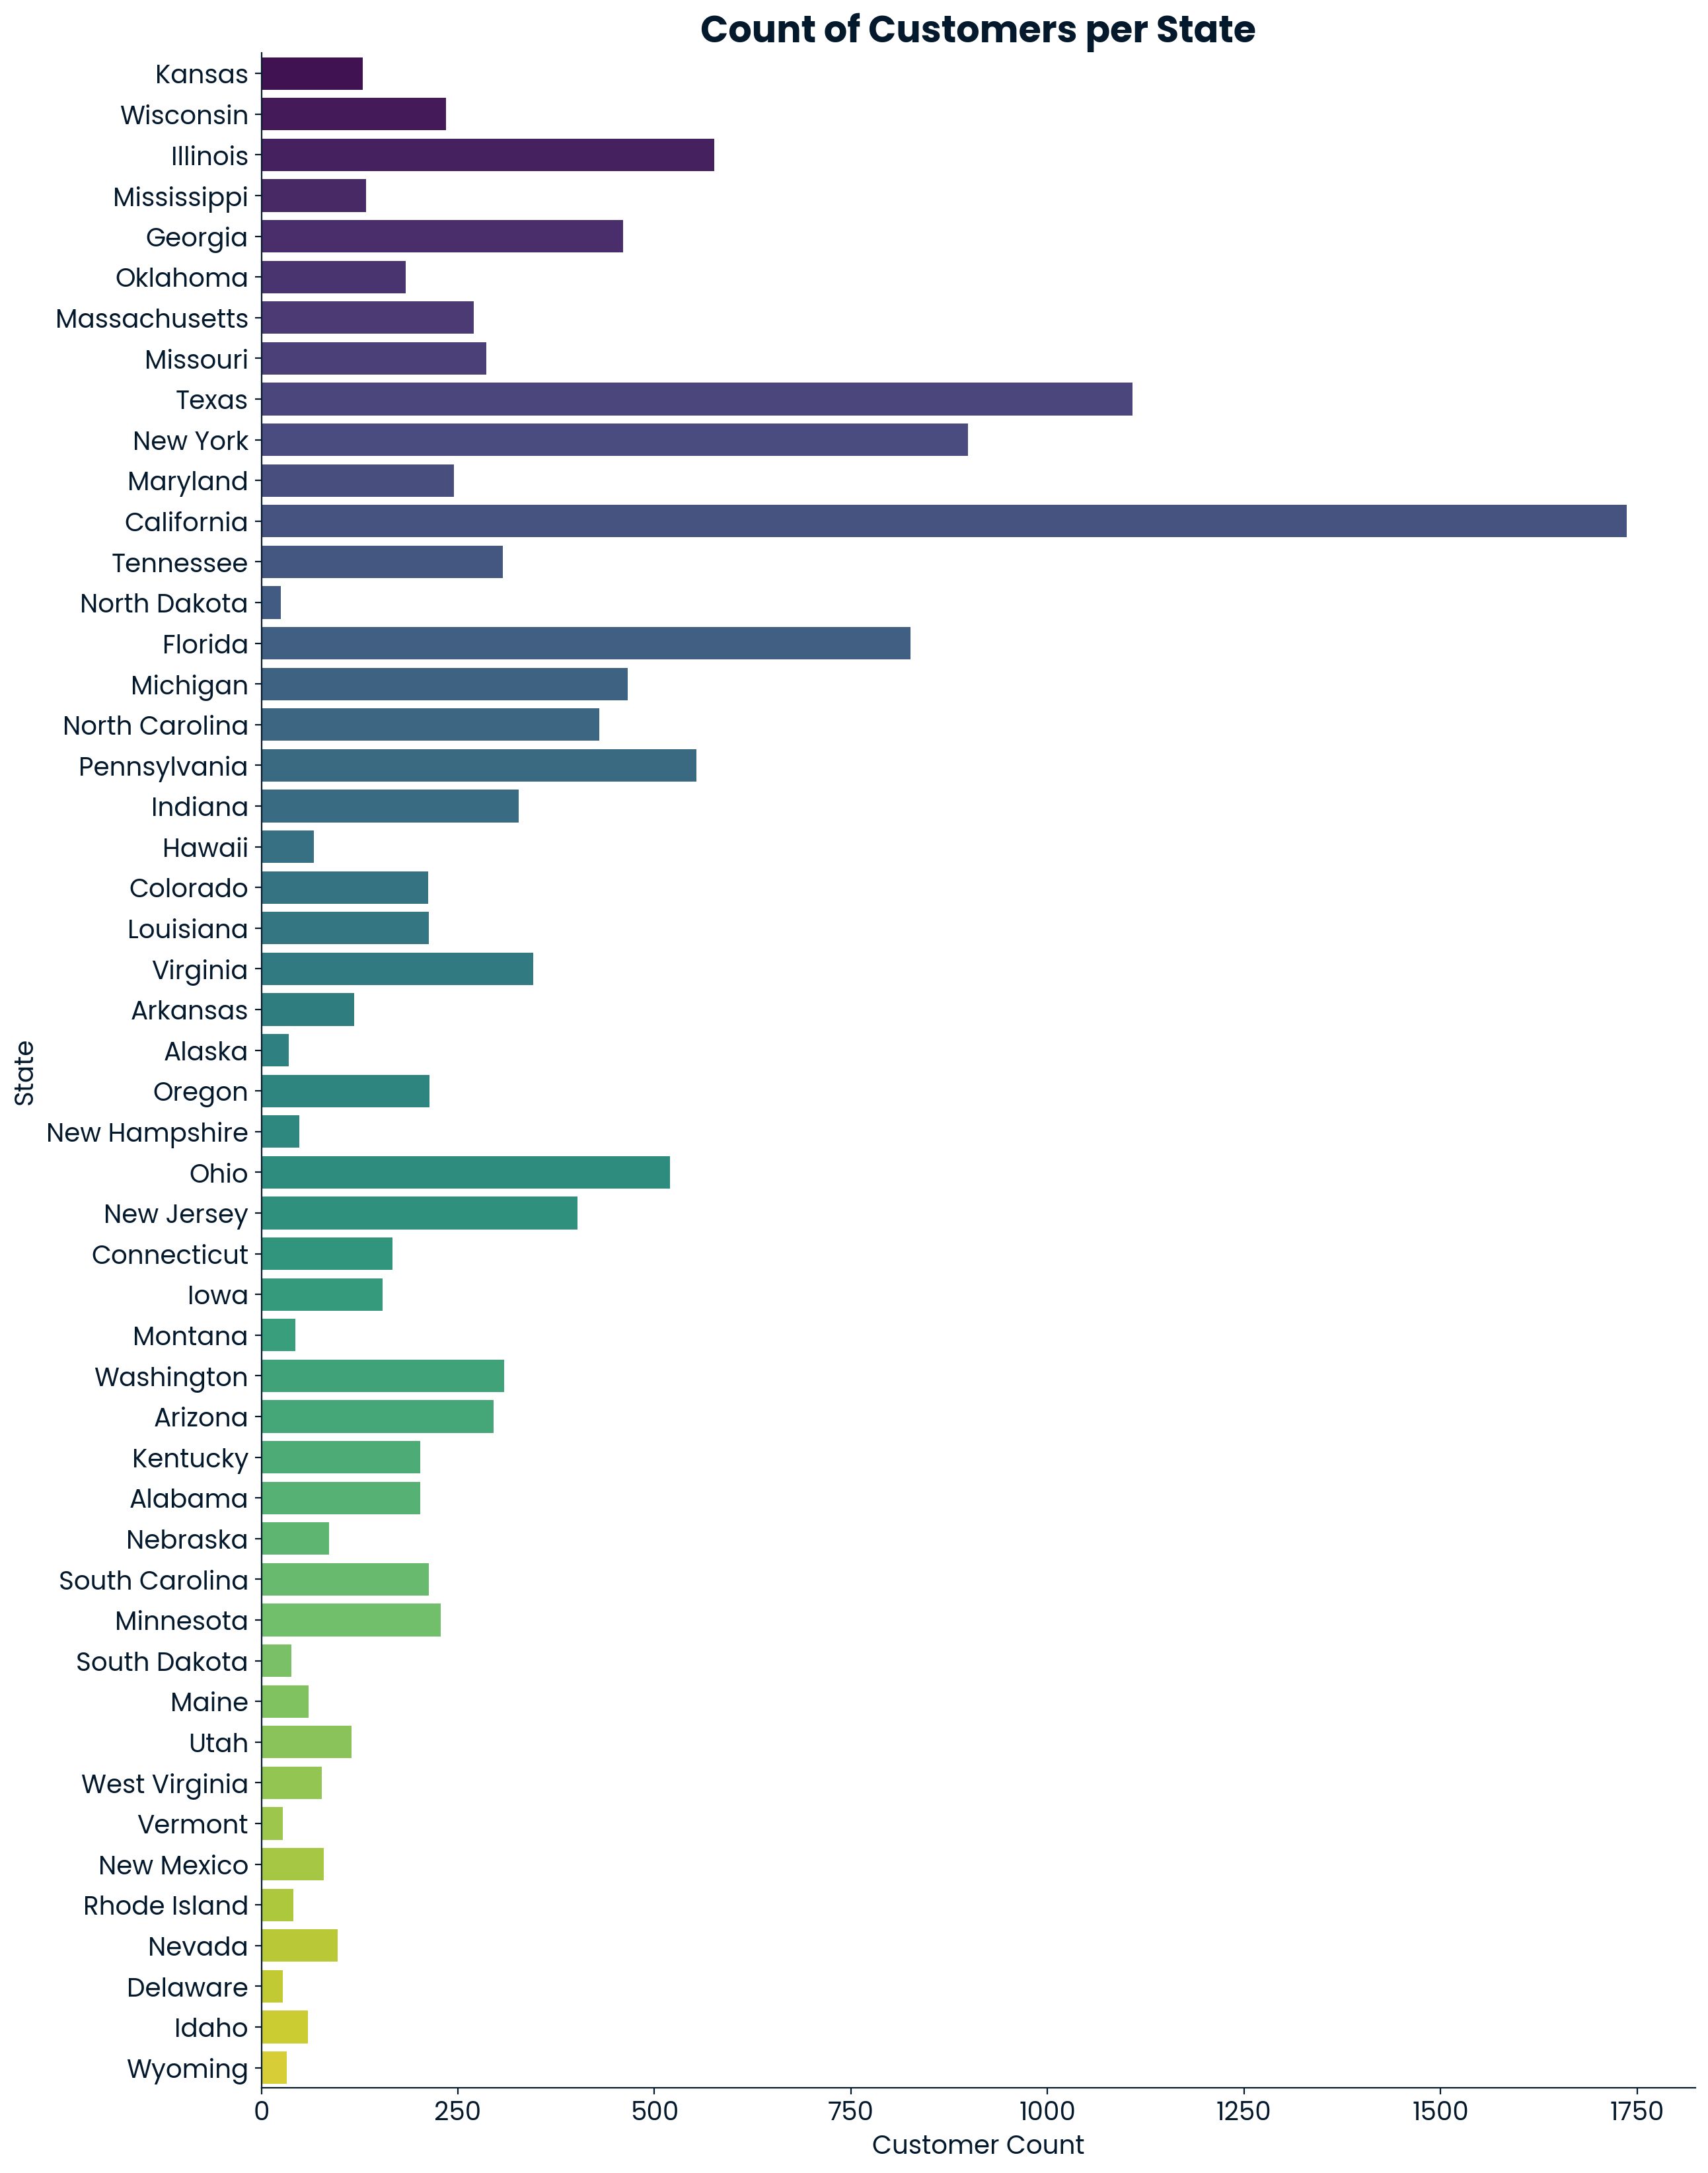

In [28]:
# Create bar chart of "state"
plt.figure(figsize=(14, 20))
sns.countplot(y='state', data=df, palette='viridis')
plt.title('Count of Customers per State', fontsize=20, weight='bold')
plt.xlabel('Customer Count', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.show()

**Findings:**

- This bar chart displays the customer counts for each state, which allowed for an easy comparison of regional distributions and helped to identify any notable patterns in customer distribution.
- California had the highest number of customers compared to other states. This was a notable trend, as it suggests a significant concentration of the customer base in California. 
- The business might consider focusing additional marketing and sales efforts in California or analyzing why this state has such a high customer count to potentially replicate successful strategies in other regions.

## Distribution of Sales Methods

To understand how different sales methods are distributed across the dataset, I created a bar chart of the "sales_method" variable. This chart helped in visualizing the frequency of each sales method used.

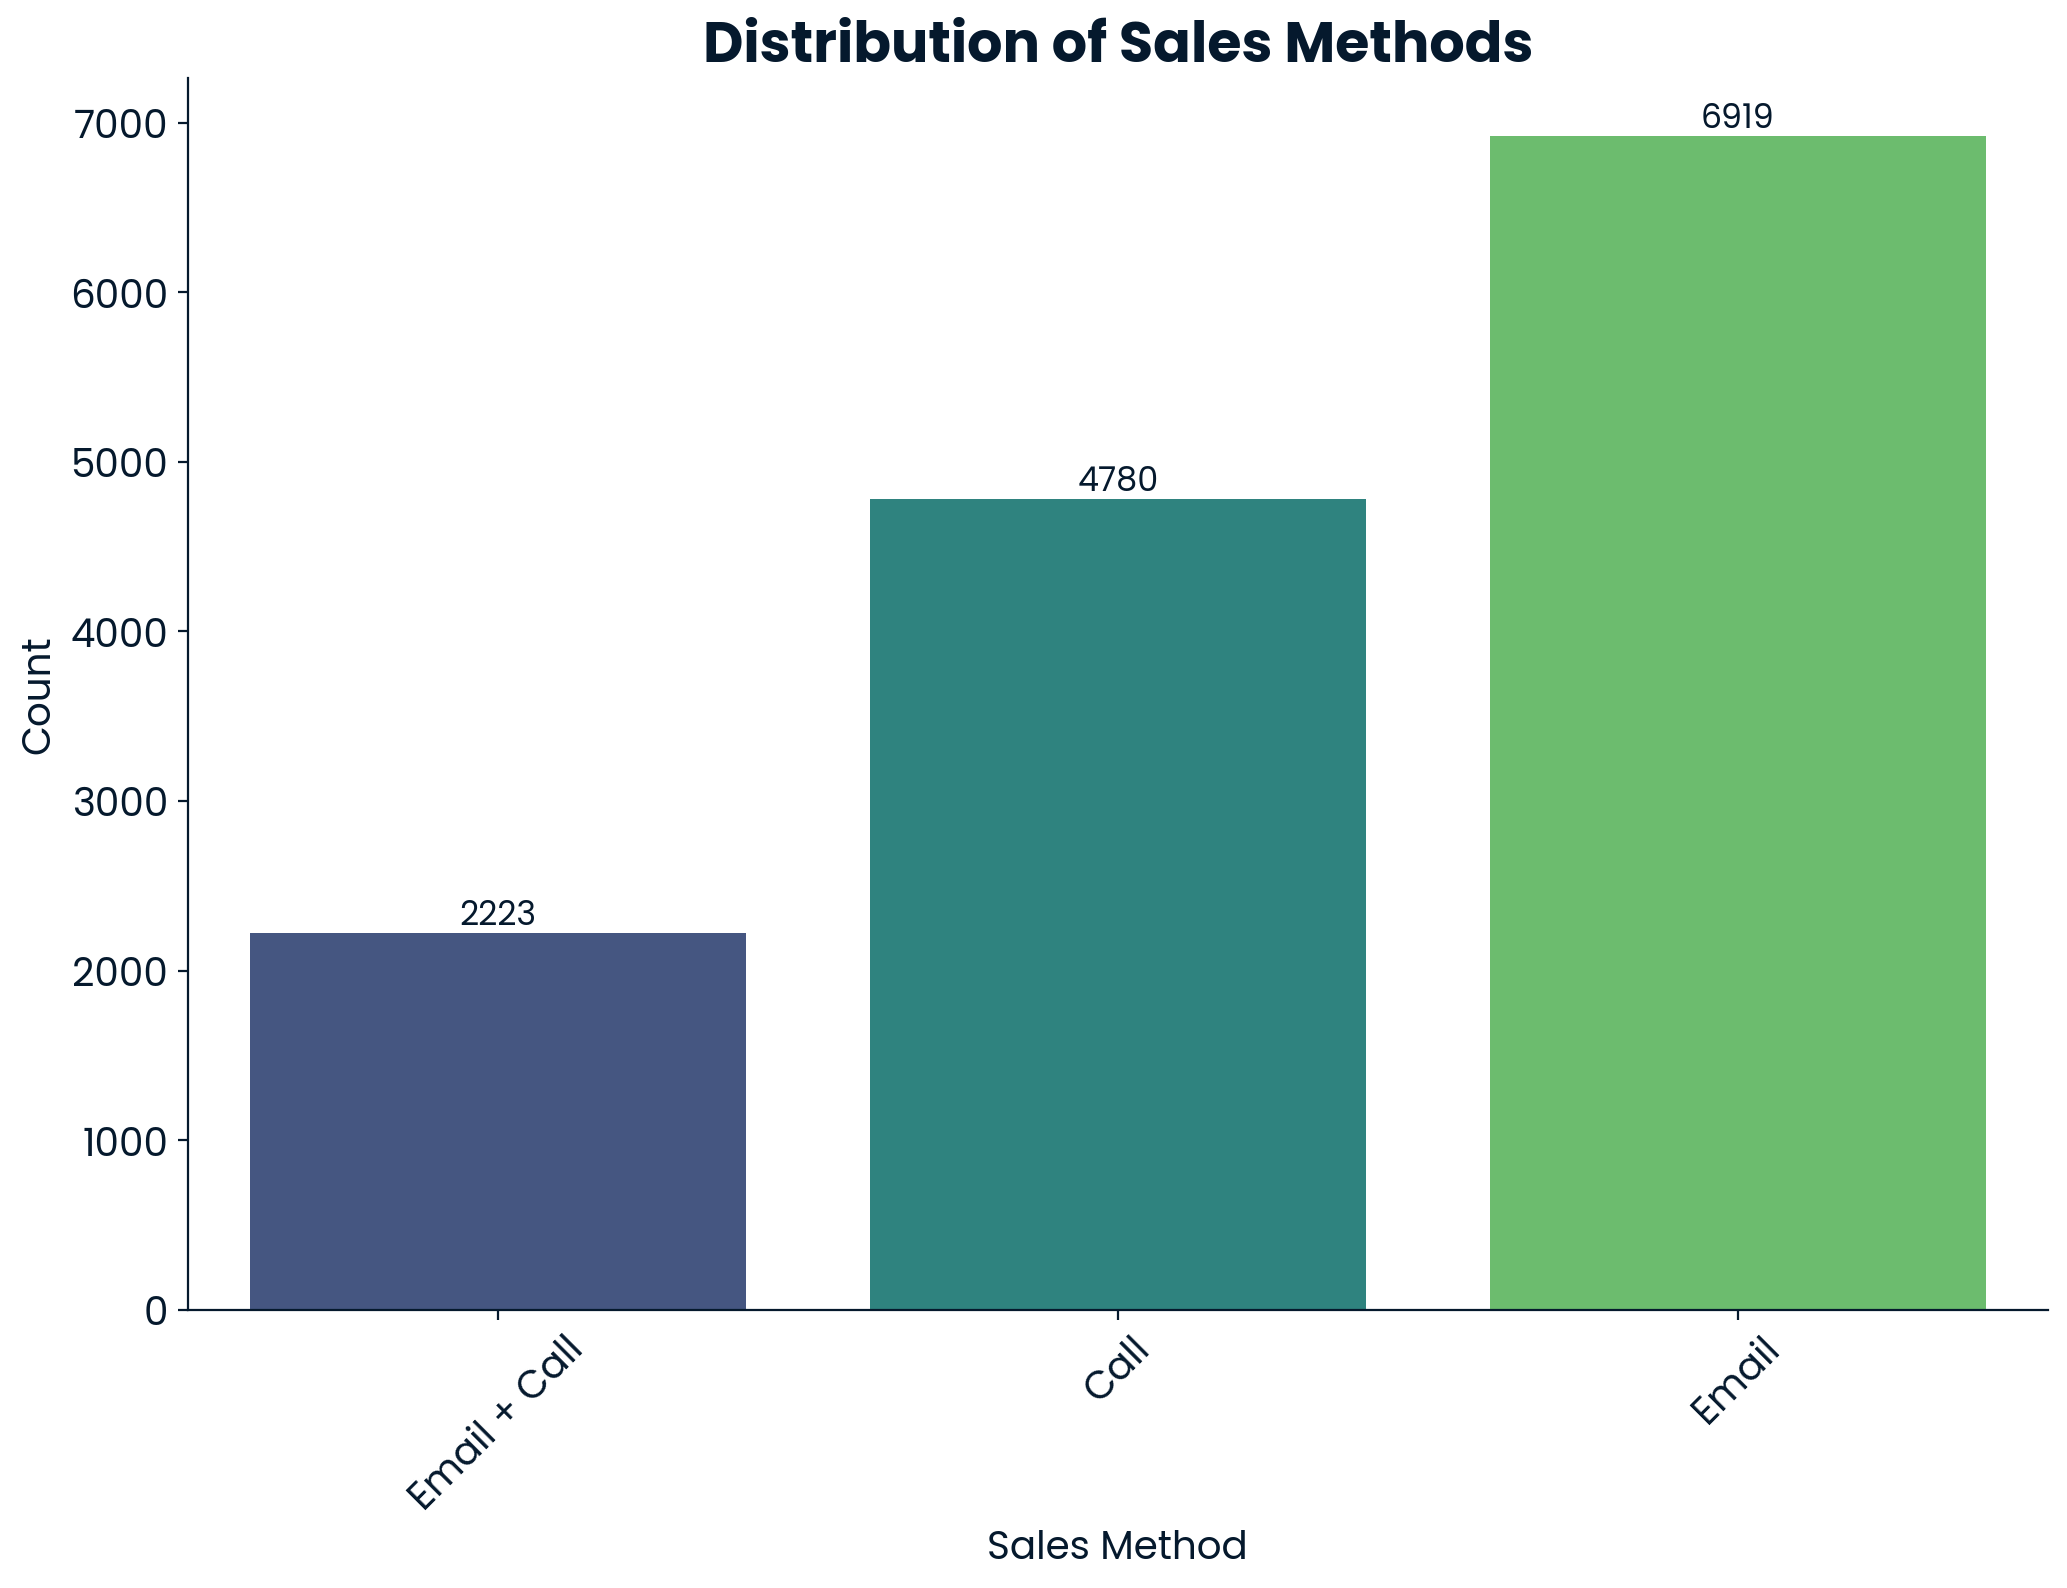

In [29]:
# Create a bar chart to visualize the distribution of sales methods
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="sales_method", data=df, palette='viridis')
plt.title("Distribution of Sales Methods", fontsize=20, weight='bold')
plt.xlabel('Sales Method', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
sns.despine()

# Add values on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), ha='center', va='bottom', fontsize=12)

plt.show()

**Findings:** 
- This bar chart provides a clear view of how frequently each sales method is used, with counts displayed above each bar for easy reference. 
- It revealed that "Email" was the most frequently used sales method, surpassing "Call" and "Email + Call.

## 2.2 Multi-Variable Analysis
In the multi-variable analysis phase, I investigated the relationships between multiple variables to uncover patterns and interactions that single-variable analyses might not have revealed. This exploration was crucial for understanding how different features interacted with one another and how these interactions could have influenced overall business outcomes.

By visualizing these relationships, I aimed to gain insights into how factors such as sales methods, number of products sold, and customer demographics collectively impact key metrics. This analysis helped in identifying trends, correlations, and potential areas for optimization in the sales strategies.

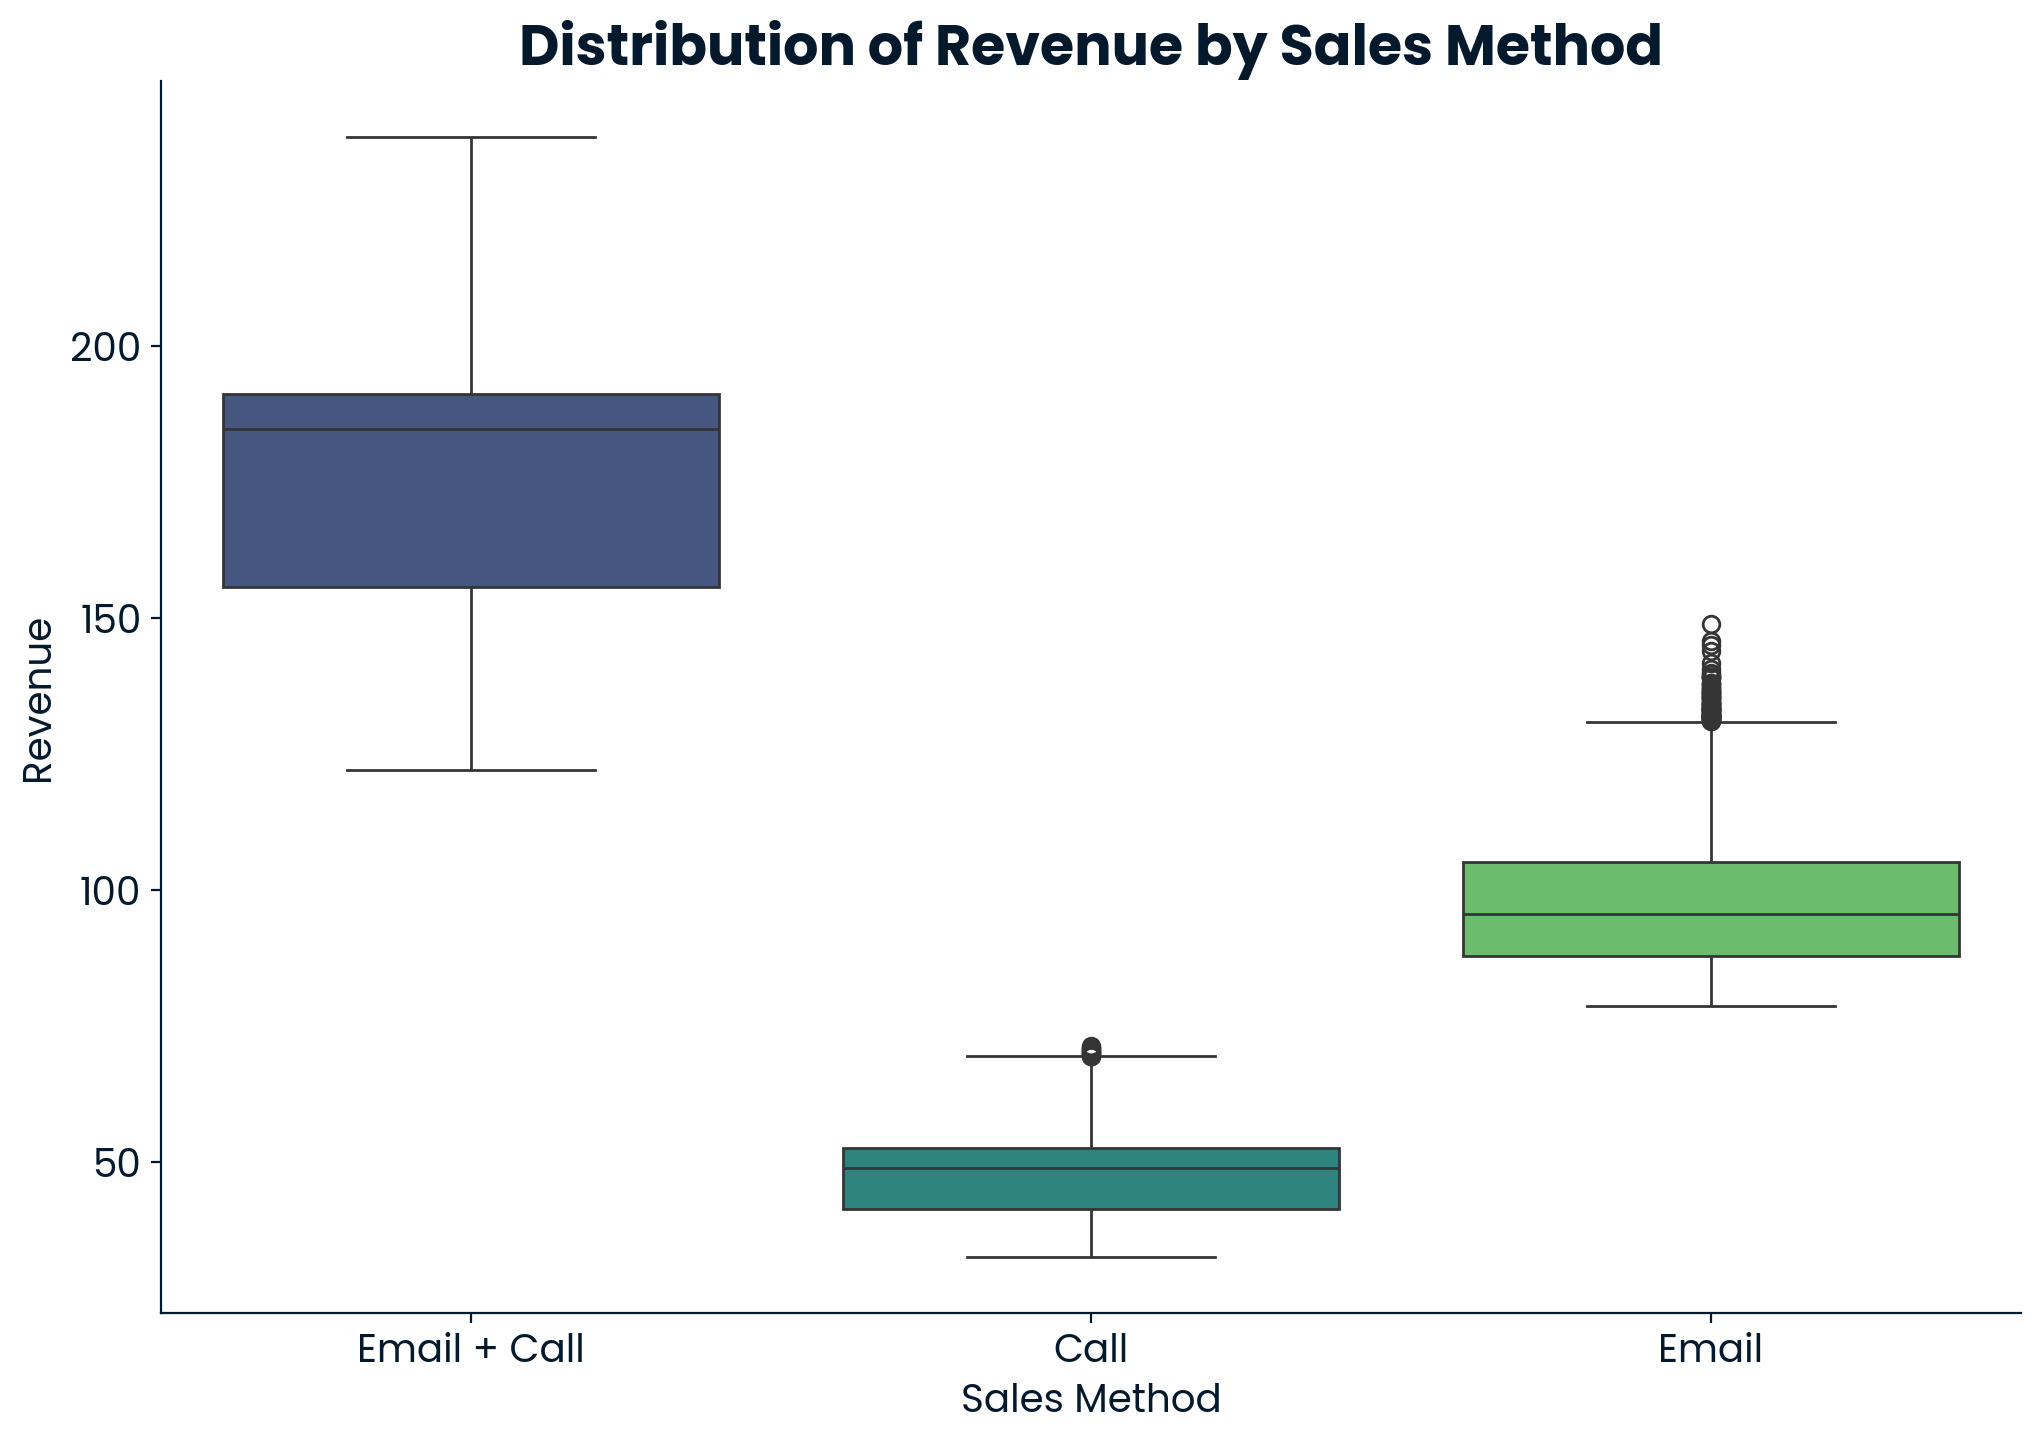

In [30]:
# Create a box plot to visualize the distribution of revenue by sales method
plt.figure(figsize=(12, 8))
sns.boxplot(x="sales_method", y="revenue", data=df, palette='viridis')
plt.title("Distribution of Revenue by Sales Method", fontsize=20, weight='bold')
plt.xlabel('Sales Method', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.show()

**Findings:**

The boxplots for revenue distribution by sales method indicated clear differences in revenue outcomes across the methods:

- Email + Call: This method had the highest median revenue and the widest interquartile range. This suggested that combining email and calls is the most effective strategy for maximizing revenue.

- Email: The revenue distribution was narrower compared to "Email + Call," with a lower median and highest number of revenue outliers. While it generated more revenue than "Call," it was still less effective than the combined approach.

- Call: This method had the lowest median revenue, with fewer revenue outliers compared to the email method.

The results indicated that the "Email + Call" approach is the most successful in generating higher revenue, followed by "Email," with "Call" being the least effective.

In [31]:
# Group the data by sales method and calculate the median and IQR for revenue
grouped_data = df.groupby('sales_method')['revenue'].agg(
    [np.median, lambda x: np.percentile(x, 75) - np.percentile(x, 25)])
grouped_data.columns = ['Median', 'IQR']

In [32]:
def print_stats(variable):
    median = statistics.median(variable)
    q1 = np.percentile(variable, 25)
    q3 = np.percentile(variable, 75)
    iqr = q3 - q1
    modes = statistics.multimode(variable)
    print(f"Median: {median:.2f}")
    print(f"IQR: {iqr:.2f}")
    print(f"Modes: {modes}")

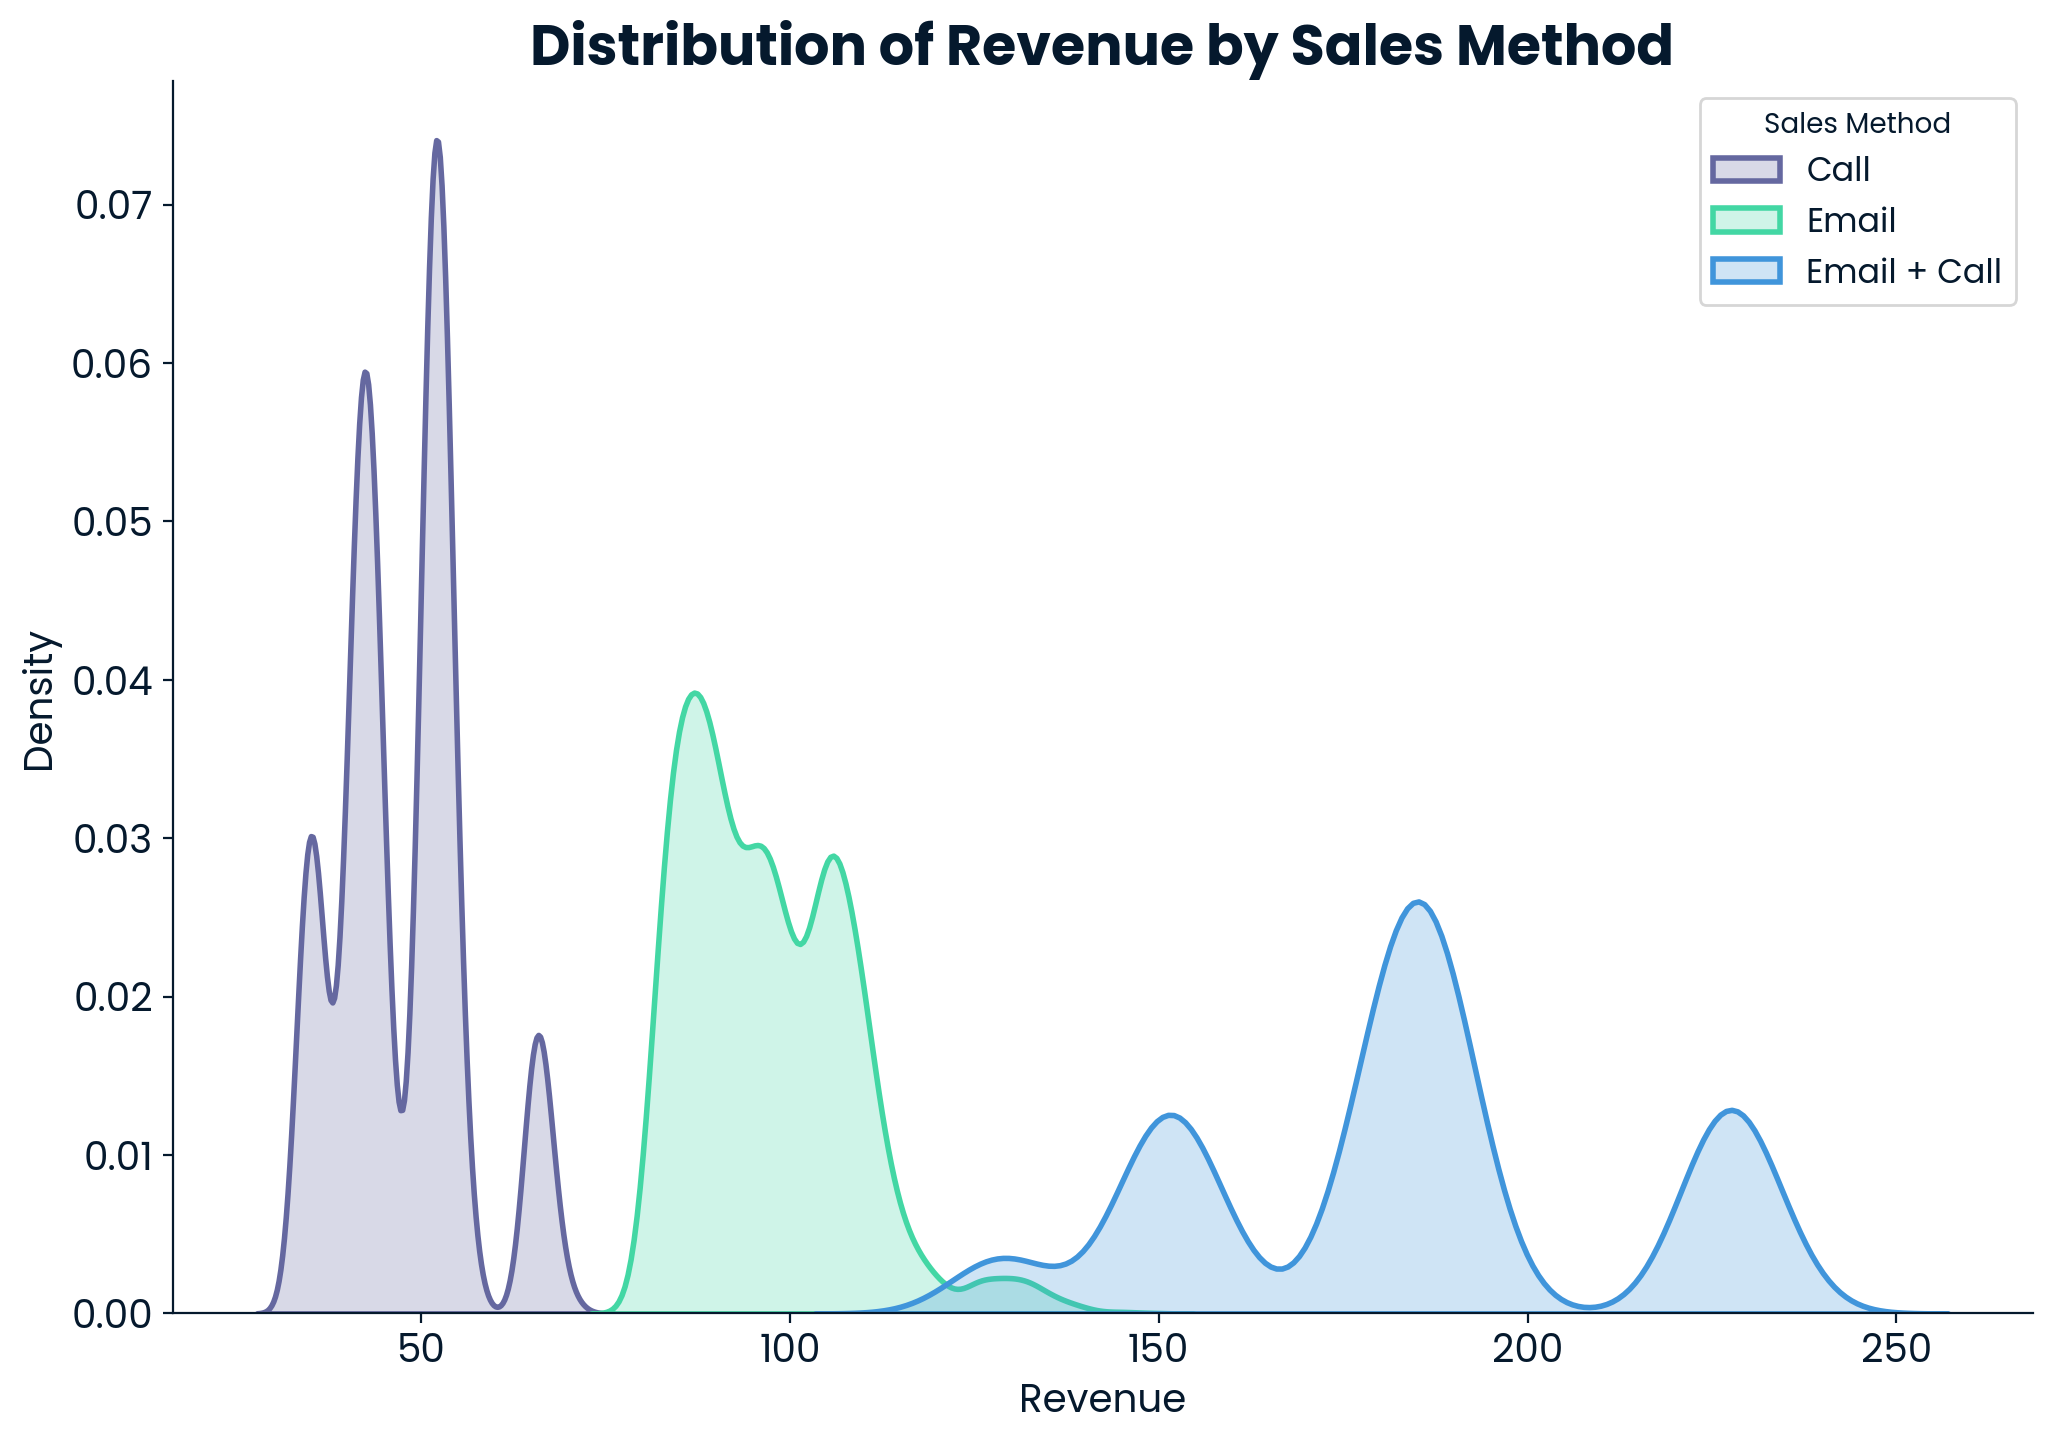

In [33]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a kernel density plot for each sales method
sns.kdeplot(df.loc[df['sales_method'] == 'Call', 'revenue'], shade=True, label='Call', linewidth=2)
sns.kdeplot(df.loc[df['sales_method'] == 'Email', 'revenue'], shade=True, label='Email', linewidth=2)
sns.kdeplot(df.loc[df['sales_method'] == 'Email + Call', 'revenue'], shade=True, label='Email + Call', linewidth=2)

# Add labels and title
plt.xlabel('Revenue', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Revenue by Sales Method', fontsize=20, weight='bold')
plt.legend(title='Sales Method', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

# Show the plot
plt.show()

**Findings:**

The KDE plots reveal edthe revenue distribution for each sales method, highlighting their effectiveness:

- Email + Call: The KDE plot showed a higher and more pronounced density of revenue, indicating that this method consistently achieved higher revenue values compared to the others.

- Email: The KDE plot showed a moderate revenue distribution, with a peak indicating a reasonable average revenue, but it does not reach the high revenue levels observed with the "Email + Call" method. The revenue density was lower compared to "Email + Call."

- Call: The KDE plot showed a lower density of revenue with a peak at a lower value, indicating that this method was the least effective in generating high revenue compared to the other methods.

Overall, the "Email + Call" method was the most successful in terms of revenue generation, followed by "Email," with "Call" being the least effective. 

In [34]:
# Calculate the mean revenue for each sales method
mean_revenue_by_sales_method = df.groupby("sales_method")["revenue"].mean()

# Print the mean revenue for each sales method
print("Mean Revenue by Sales Method:")
print(mean_revenue_by_sales_method)

Mean Revenue by Sales Method:
sales_method
Call             47.596866
Email            97.128734
Email + Call    183.651233
Name: revenue, dtype: float64


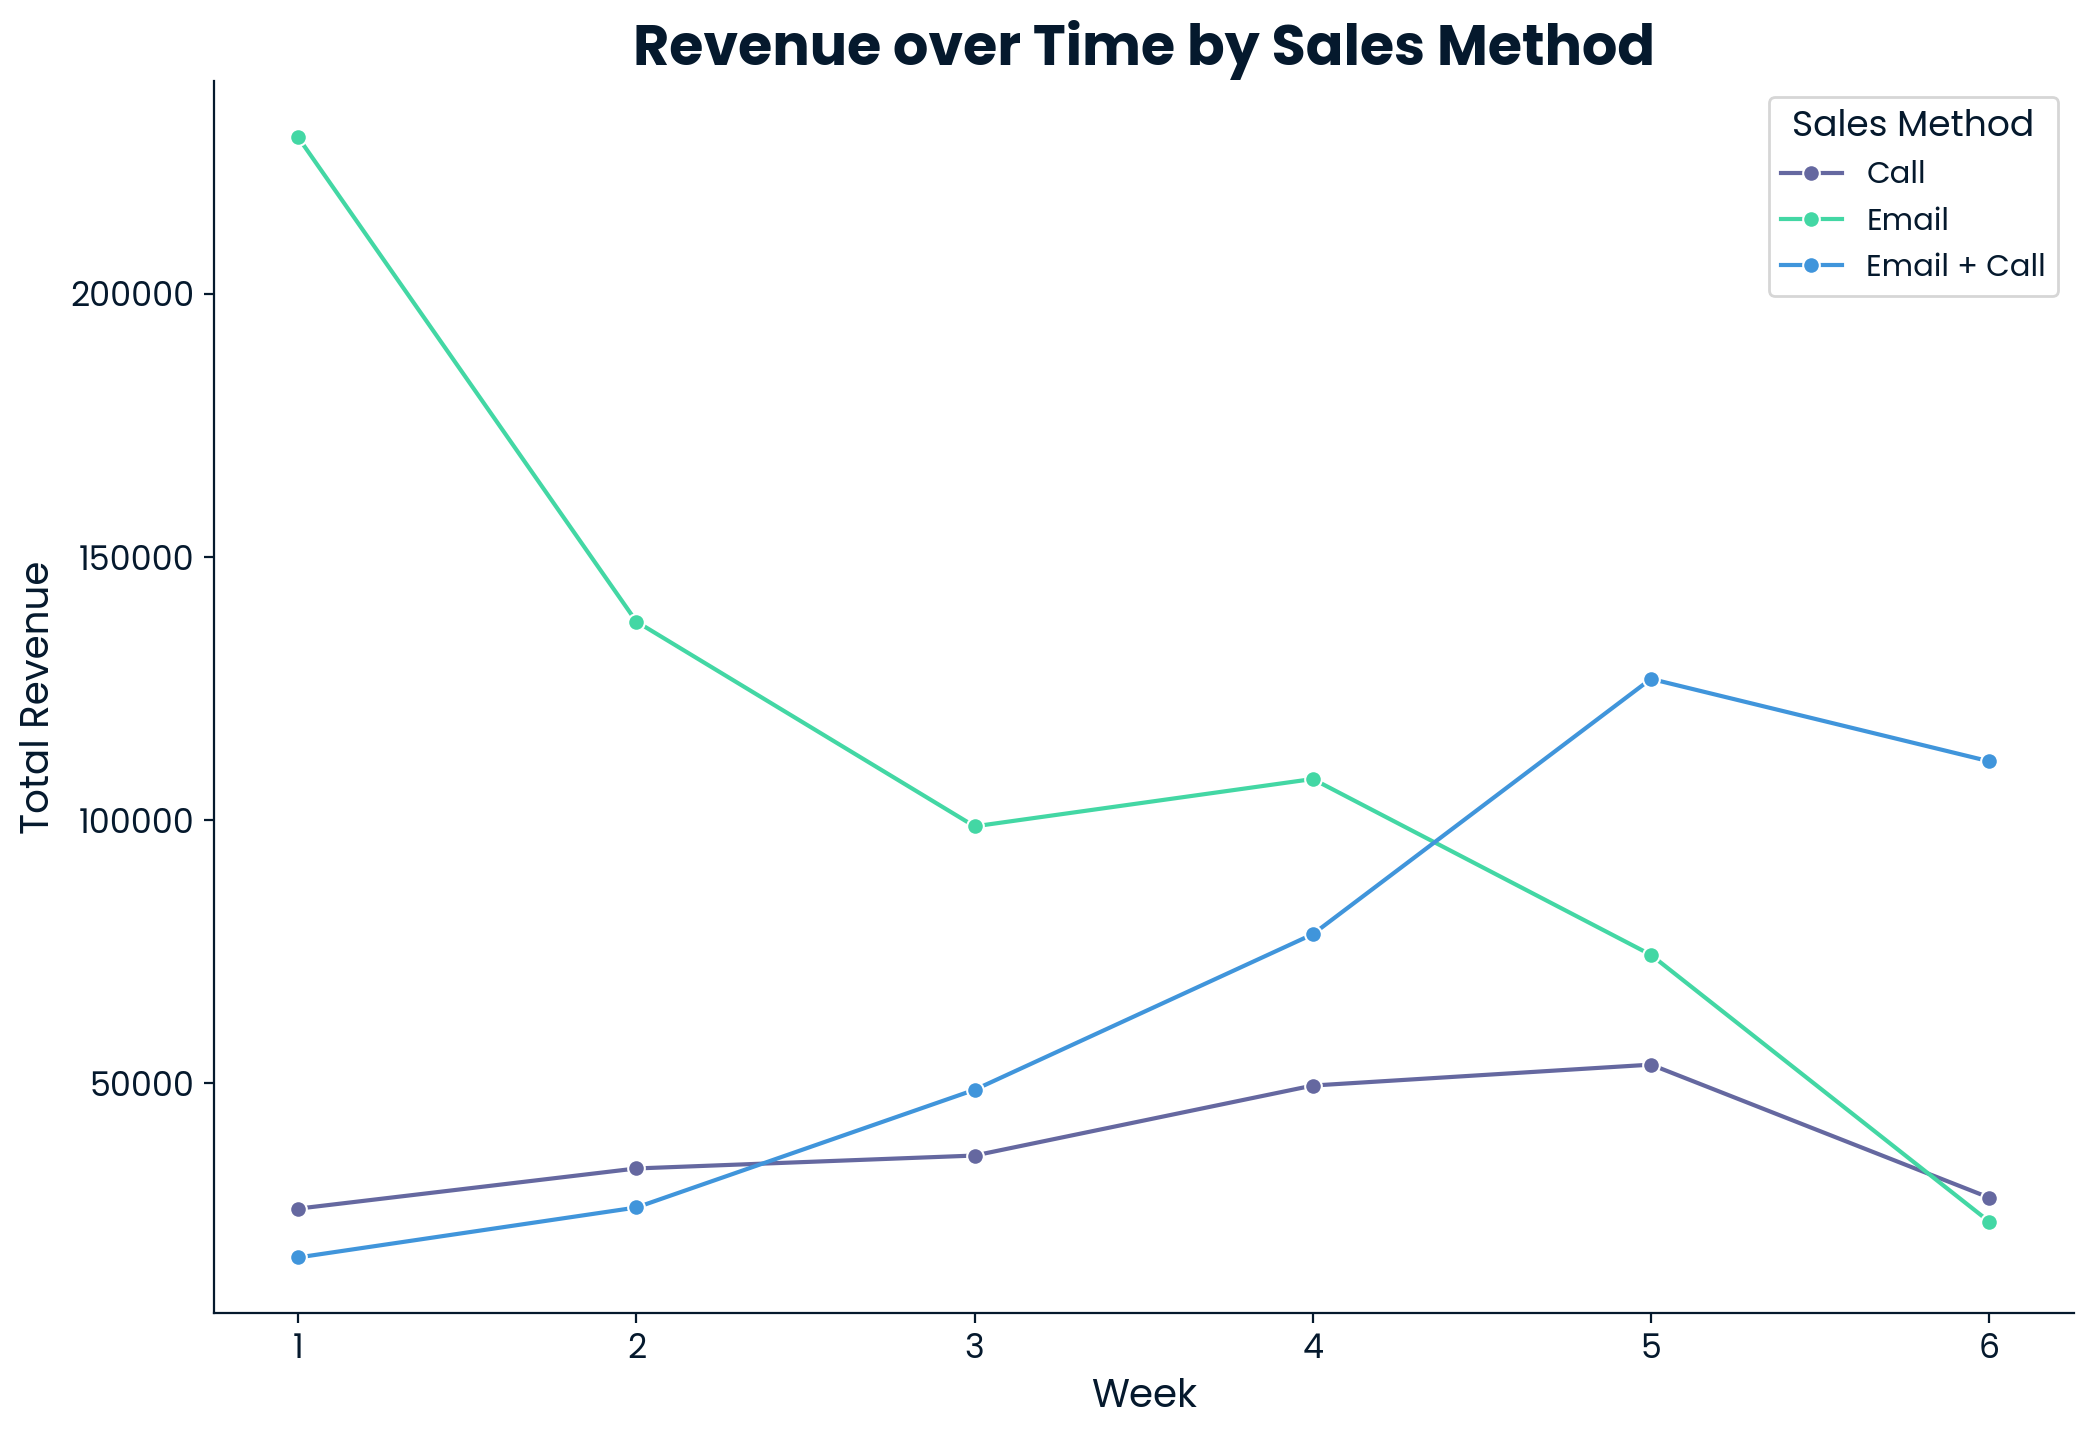

In [35]:
# Group the data by week and sales method and calculate the total revenue
grouped_data = df.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()

# Create a line plot to visualize the revenue for each sales method over time
plt.figure(figsize=(12, 8))
sns.lineplot(x='week', y='revenue', hue='sales_method', data=grouped_data, marker='o')
plt.title("Revenue over Time by Sales Method", fontsize=20, weight='bold')
plt.xlabel('Week', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.legend(title='Sales Method', title_fontsize='13', fontsize='11')
plt.show()

**Findings:** 

The line plot of revenue over time by sales method provided insights into the performance trends for each sales approach:

- Email: The revenue for the Email method started high but showed a steady decline over time. This indicated an initial strong performance, which diminishds as time progressed, suggesting a potential decrease in the effectiveness of the Email method in sustaining revenue growth.

- Call: The revenue for the Call method did not experience significant growth and began to decline. This suggests that the Call method had a limited impact on revenue generation over time.

- Email + Call: The revenue for the Email + Call method showed a steady increase over time, reflecting continuous growth and improved performance. This indicateed that the combined approach maintains its effectiveness and contributed positively to revenue generation over the entire period analyzed.

Overall, the Email + Call method demonstrated the most consistent and growing revenue trend, making it the most effective strategy for long-term revenue generation.


In [36]:
# Group the data by sales_method and week and calculate the number of unique customers and sum of nb_sold and revenue
df_grouped = df.groupby(['sales_method', 'week']).agg(
    {'customer_id': pd.Series.nunique, 'nb_sold': 'sum', 'revenue': 'sum'}
).reset_index()

# Print the results for each sales_method
for method in df['sales_method'].unique():
    print(f"Sales method: {method}")
    print(df_grouped[df_grouped['sales_method'] == method])
    print()

Sales method: Email + Call
    sales_method  week  customer_id  nb_sold    revenue
12  Email + Call     1          131     1133   16885.33
13  Email + Call     2          171     1722   26376.23
14  Email + Call     3          324     3244   48737.14
15  Email + Call     4          433     5212   78296.20
16  Email + Call     5          676     8430  126809.72
17  Email + Call     6          488     7350  111152.07

Sales method: Call
  sales_method  week  customer_id  nb_sold   revenue
0         Call     1          740     5239  26159.18
1         Call     2          775     6823  33792.02
2         Call     3          868     7177  36247.27
3         Call     4          963     9831  49543.52
4         Call     5         1007    10731  53518.11
5         Call     6          427     5613  28252.92

Sales method: Email
   sales_method  week  customer_id  nb_sold    revenue
6         Email     1         2625    22917  229680.06
7         Email     2         1375    13837  137692.94
8   

In [37]:
# Count the number of unique customer IDs for each week and sales method
customers_data = df.groupby(['week', 'sales_method'])['customer_id'].nunique().reset_index()
customers_data = customers_data.rename(columns={'customer_id': 'nb_customers'})

# Count the number of items sold for each week and sales method
items_data = df.groupby(['week', 'sales_method'])['nb_sold'].sum().reset_index()

# Group the data by week and sales method to calculate revenue
grouped_data = df.groupby(['week', 'sales_method']).sum().reset_index()

## Number of Customers over Time by Sales Method
This line plot shows the number of unique customers for each sales method over time (by week).

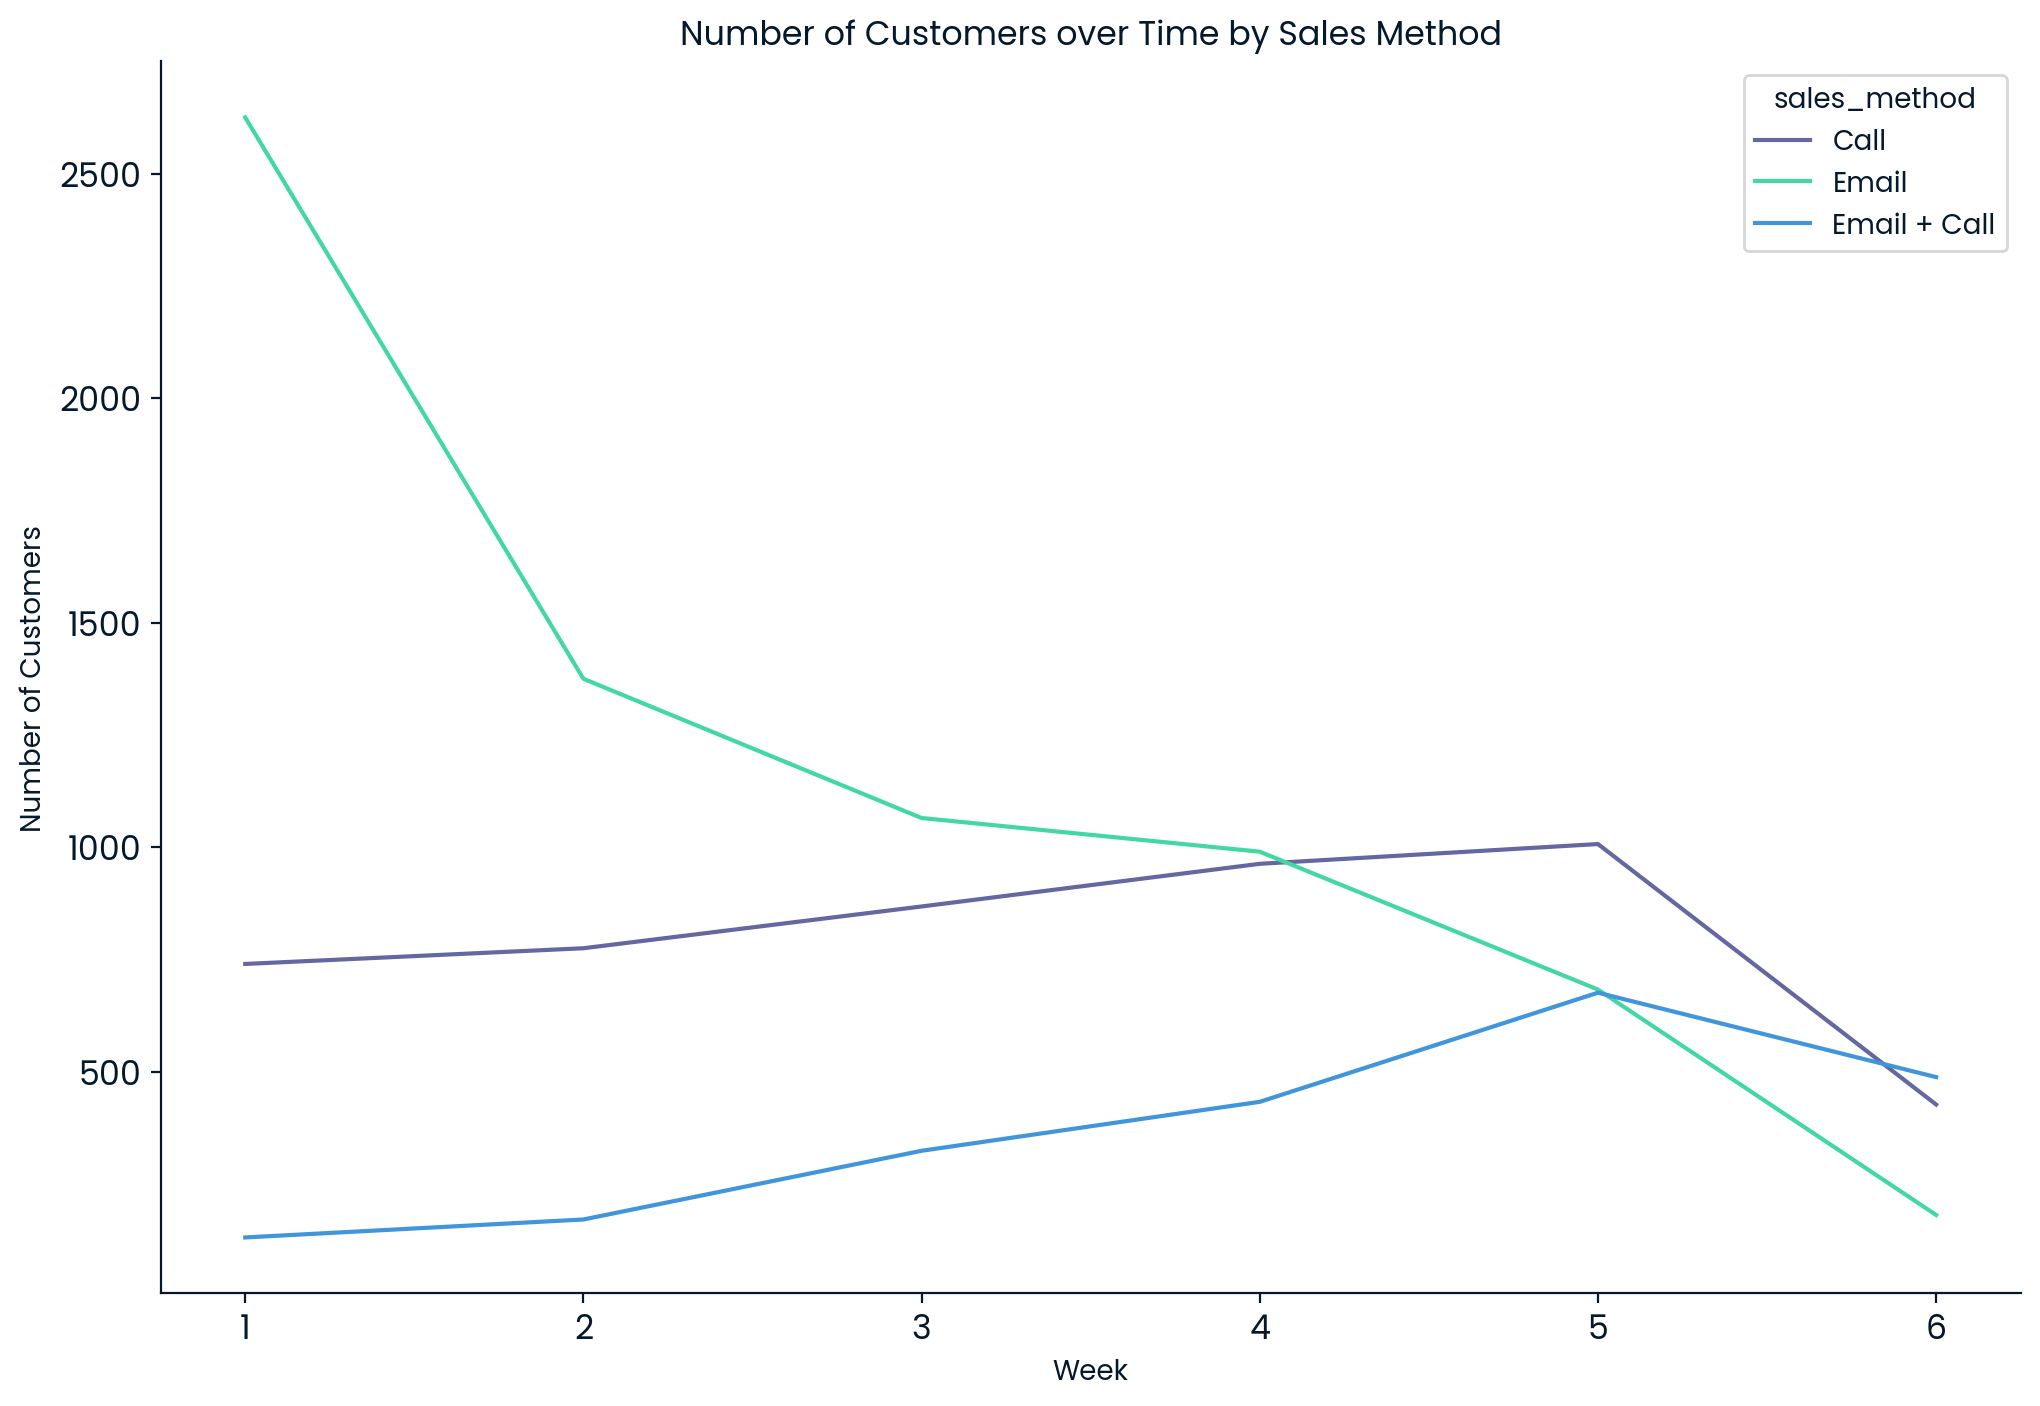

In [38]:
# Plot the number of customers for each sales method over time
plt.figure(figsize=(12, 8))
sns.lineplot(x='week', y='nb_customers', hue='sales_method', data=customers_data)
plt.title("Number of Customers over Time by Sales Method")
plt.xlabel('Week')
plt.ylabel('Number of Customers')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

## Number of Items Sold over Time by Sales Method
This line plot shows the number of items sold for each sales method over time (by week).

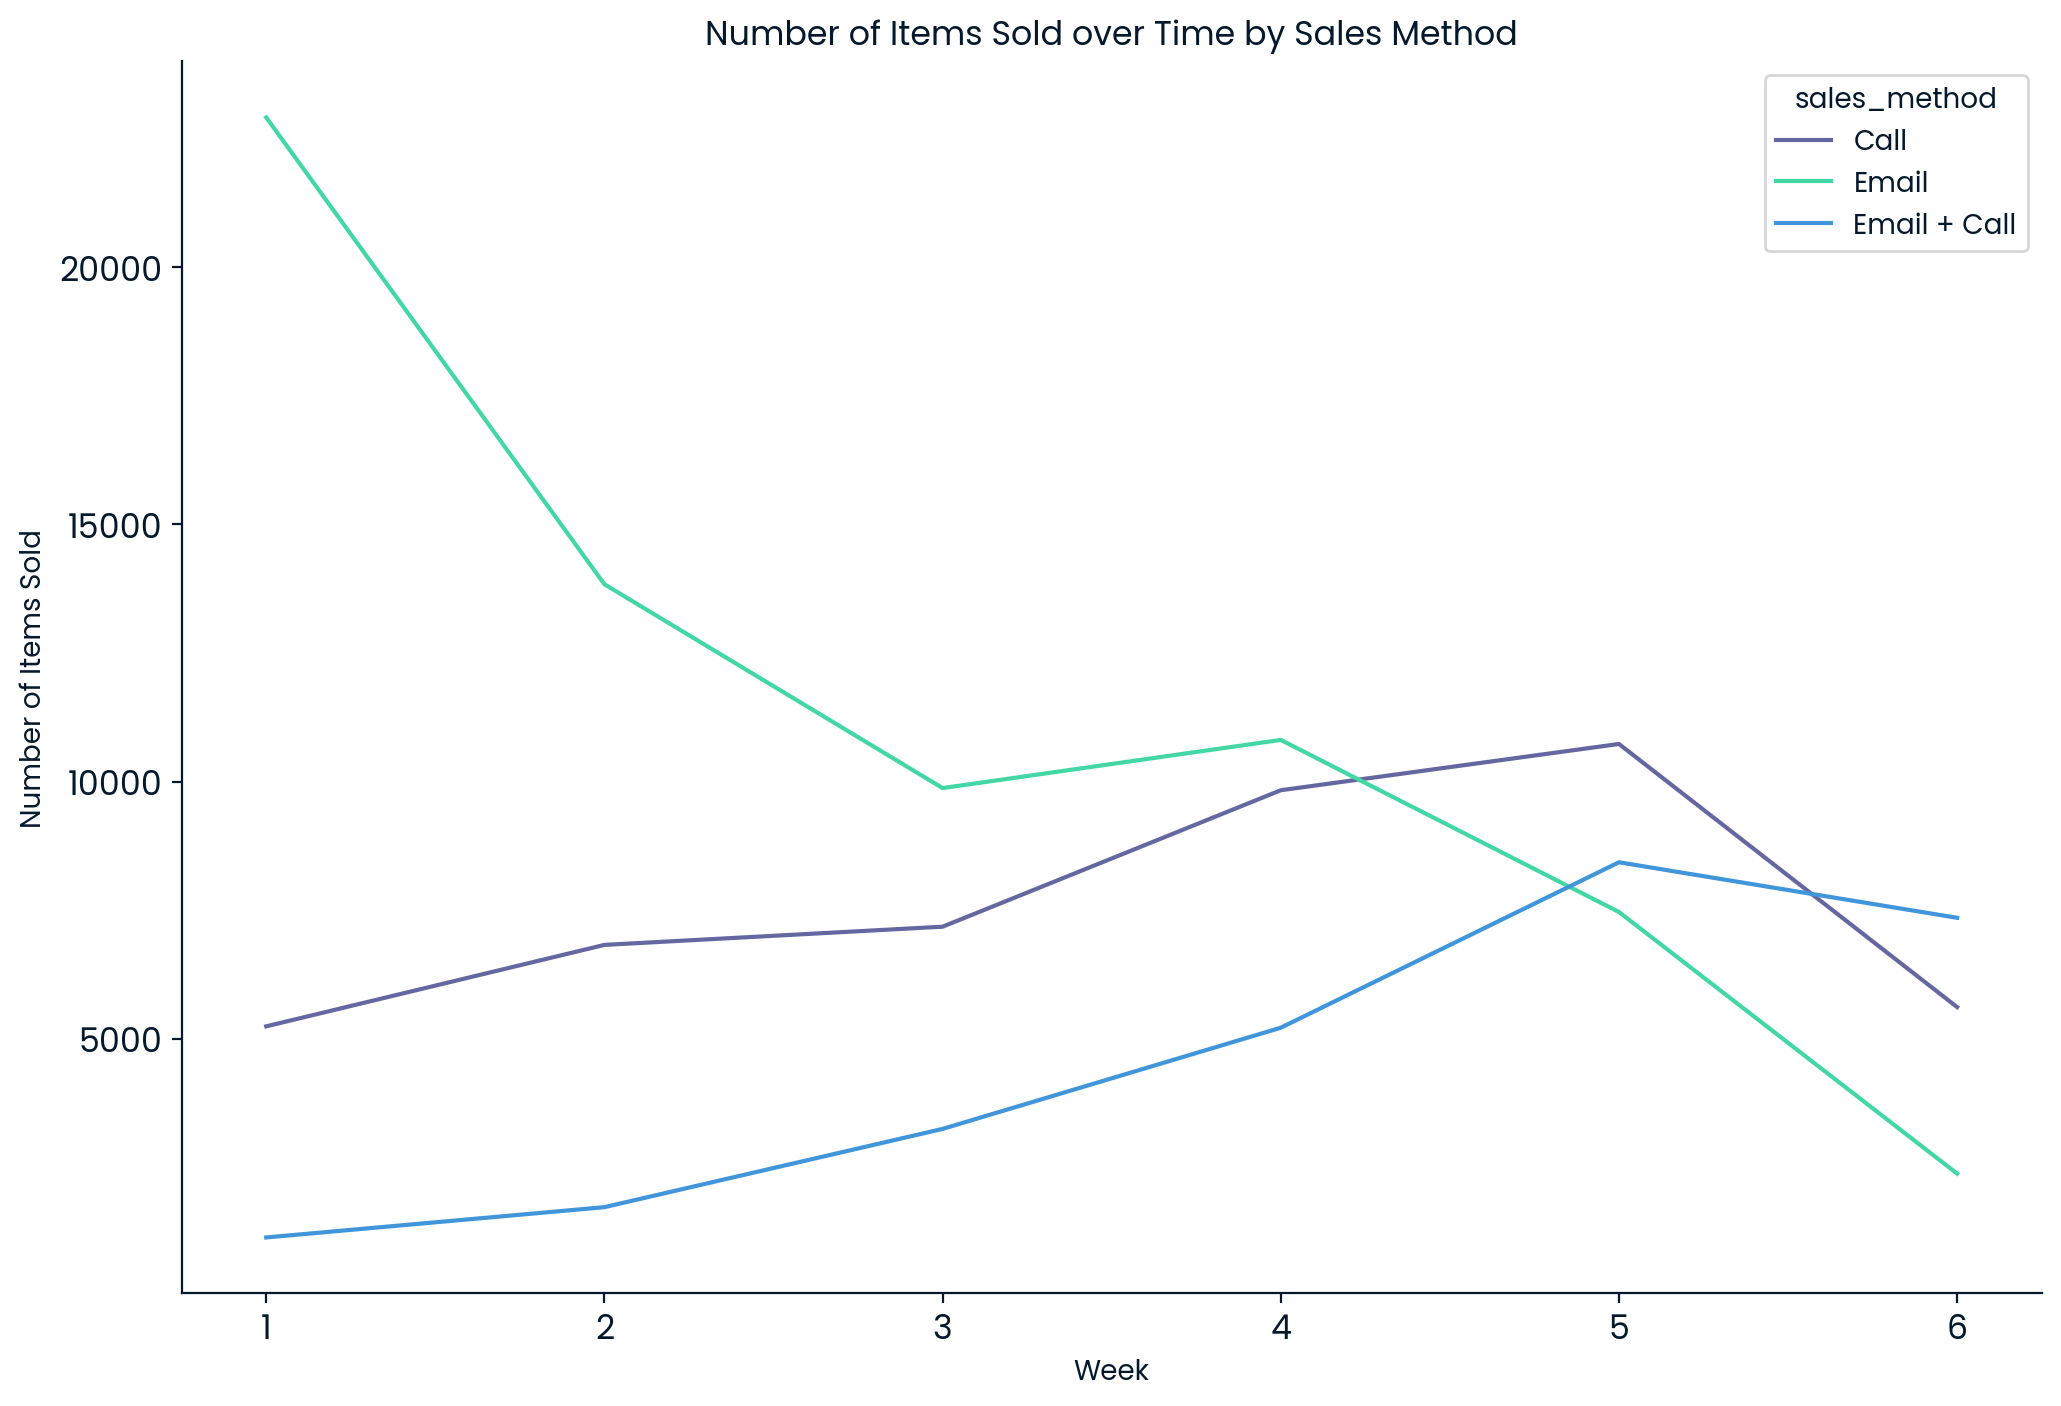

In [39]:
# Plot the number of items sold for each sales method over time
plt.figure(figsize=(12, 8))
sns.lineplot(x='week', y='nb_sold', hue='sales_method', data=items_data)
plt.title("Number of Items Sold over Time by Sales Method")
plt.xlabel('Week')
plt.ylabel('Number of Items Sold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

## Revenue over Time by Sales Method
This line plot shows the revenue generated for each sales method over time (by week).

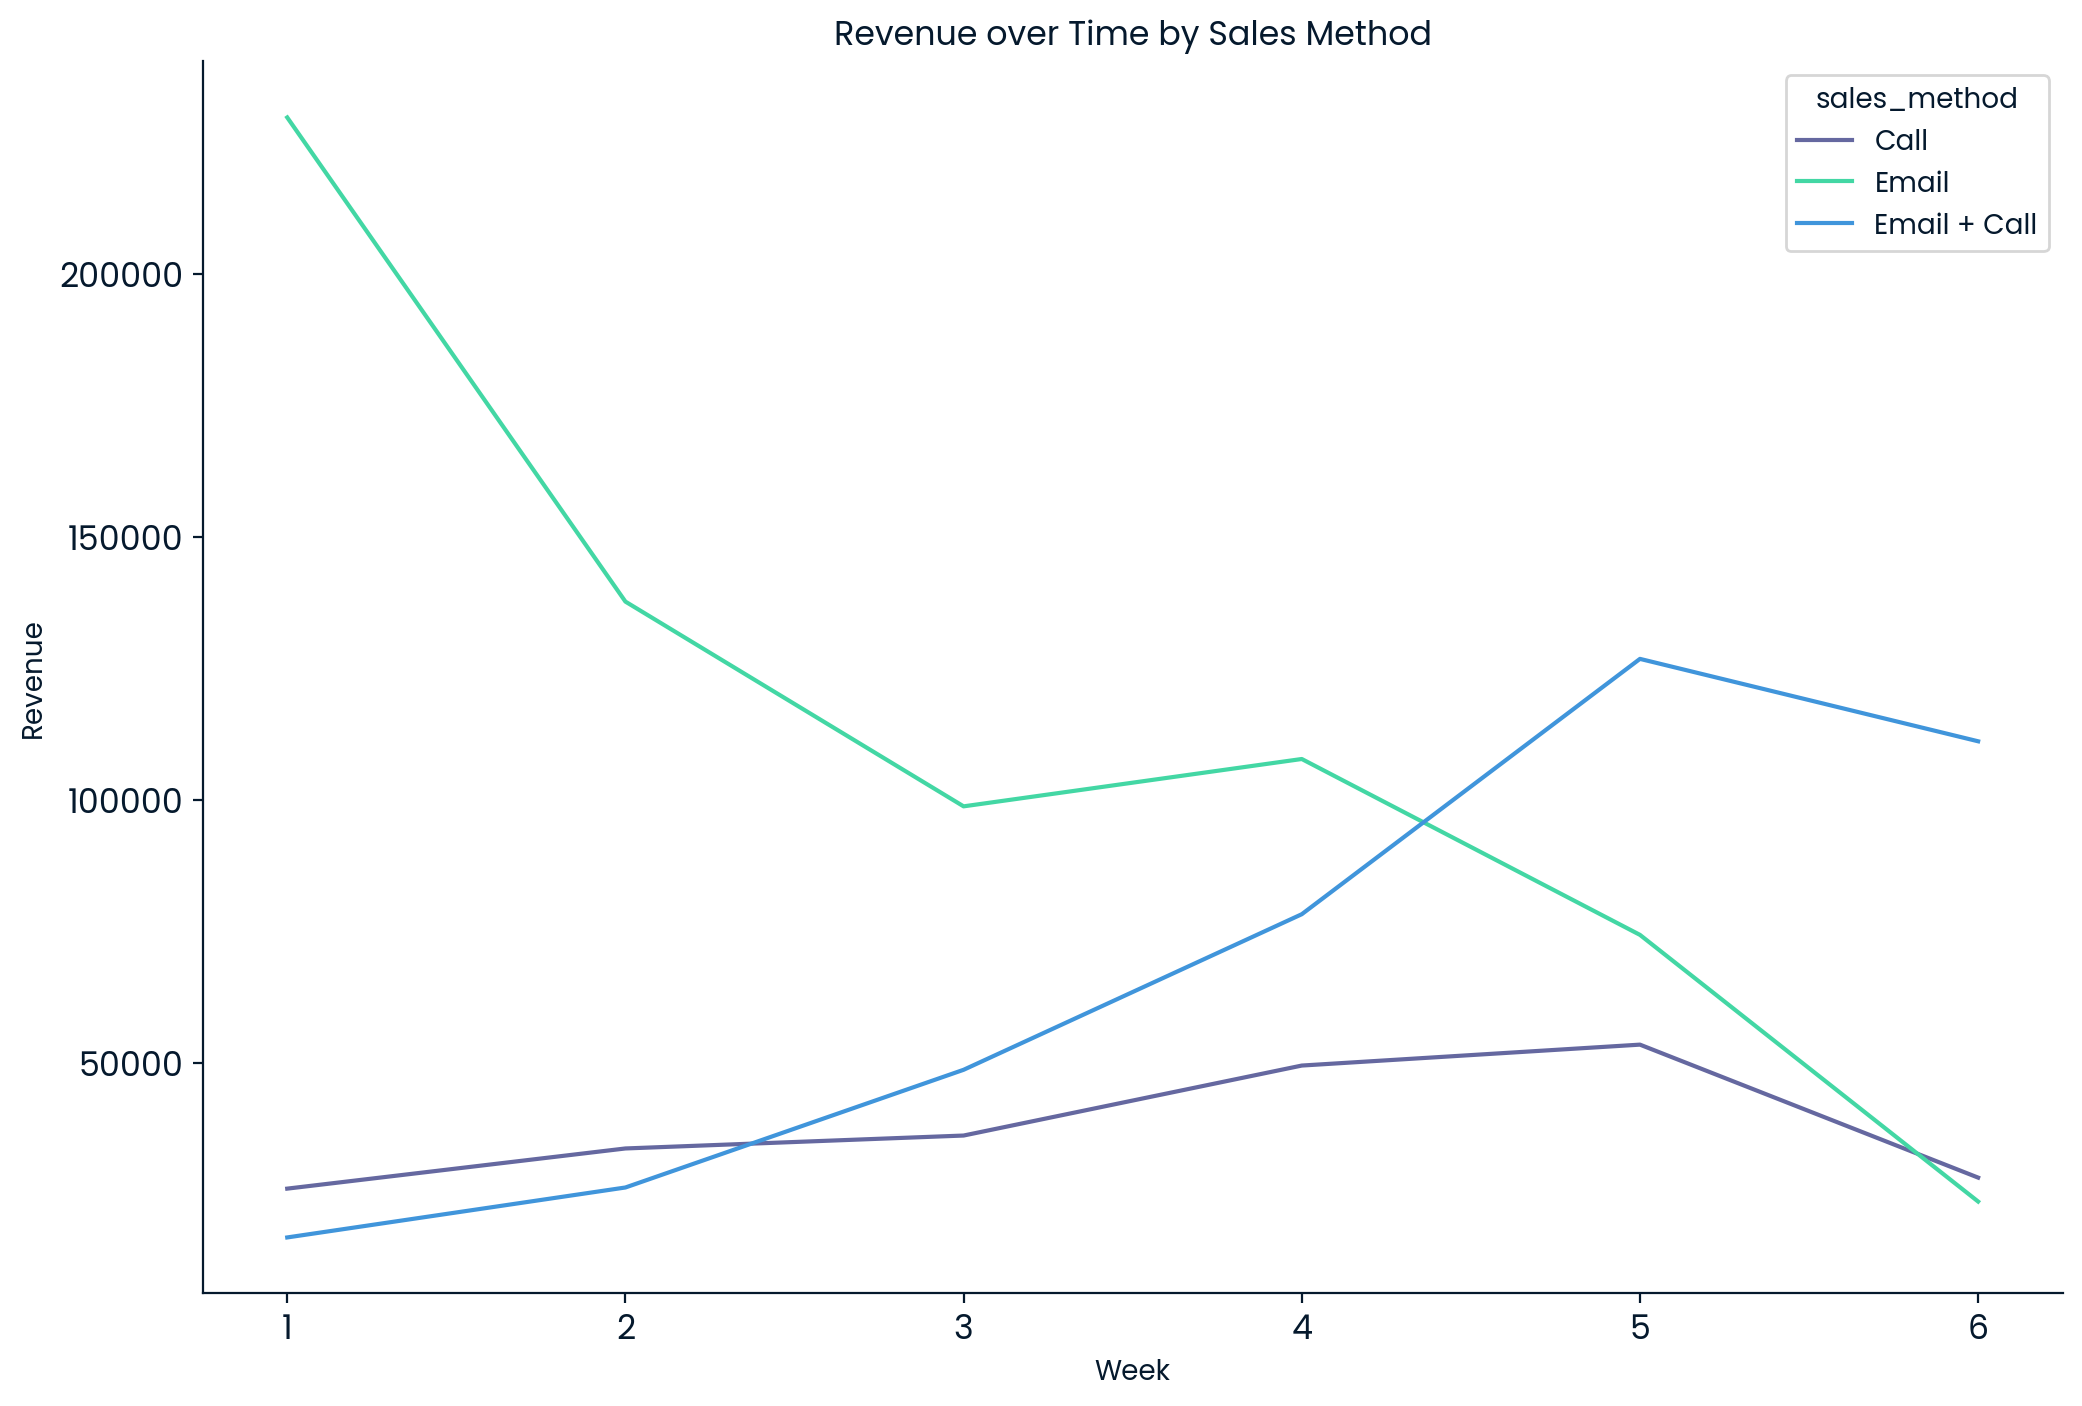

In [40]:
# Plot the revenue generated for each sales method over time
plt.figure(figsize=(12, 8))
sns.lineplot(x='week', y='revenue', hue='sales_method', data=grouped_data)
plt.title("Revenue over Time by Sales Method")
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

## Average Units Sold and Revenue by Sales Method
The bar chart compared two metrics: `nb_sold`  and `revenue`, across three sales methods: ‘Call,’ ‘Email,’ and ‘Email + Call.’

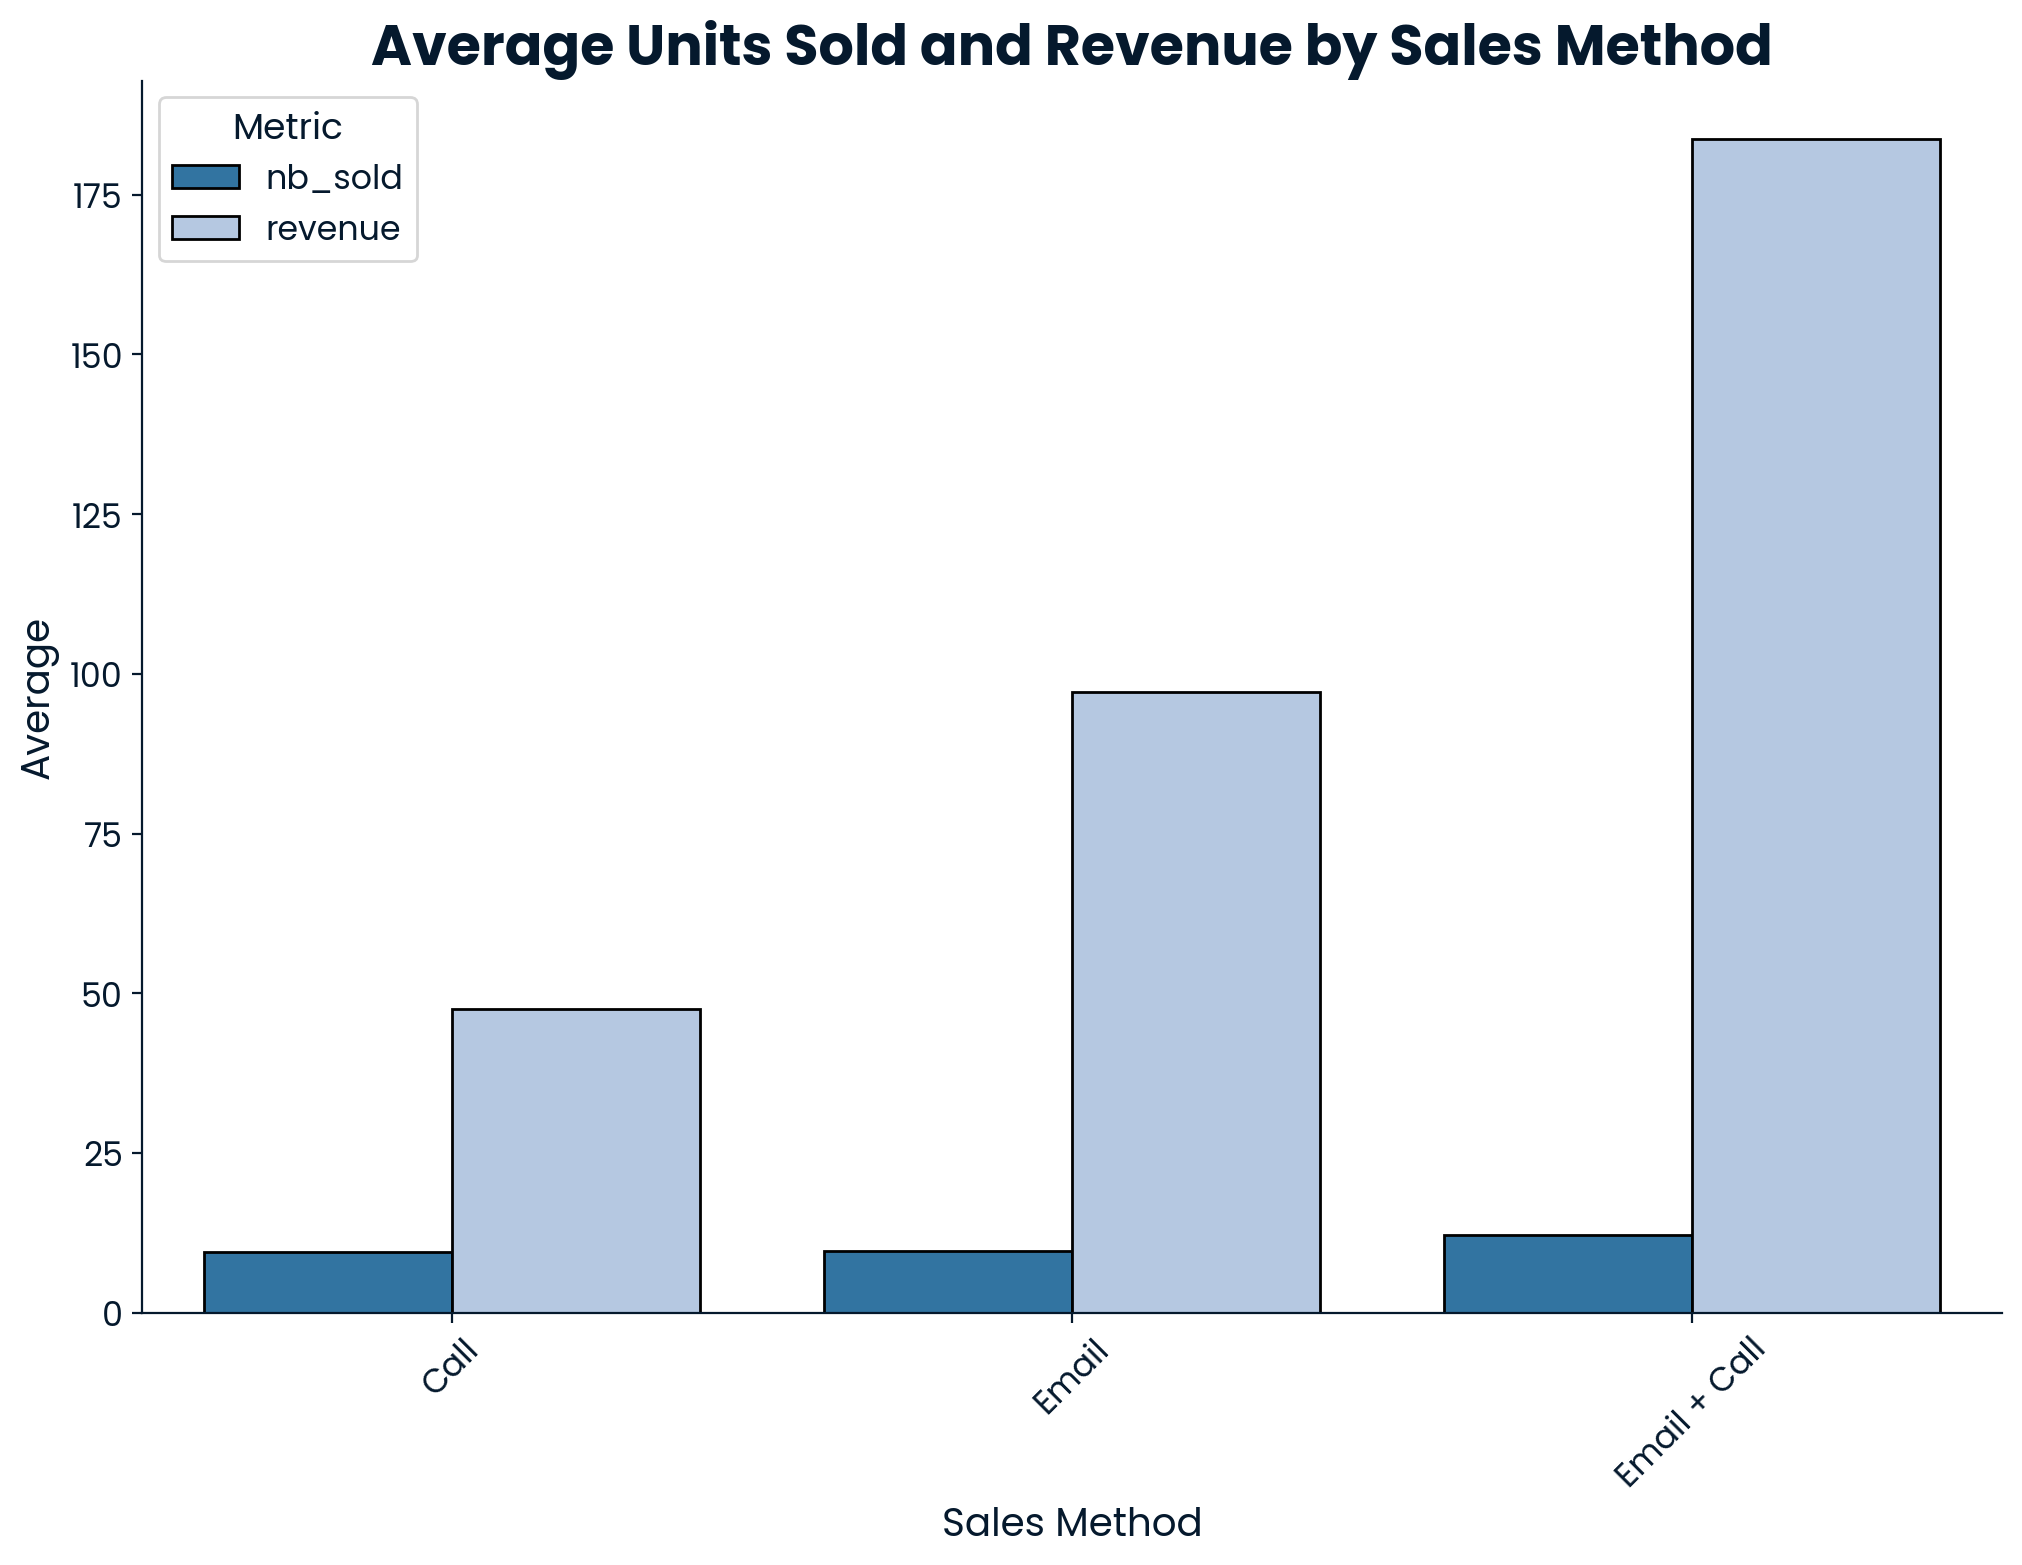

In [41]:
# Create pivot table
sales_pivot = pd.pivot_table(df, values=['nb_sold', 'revenue'], index=['sales_method'], aggfunc=np.mean).reset_index()
sales_pivot = sales_pivot.melt(id_vars='sales_method', var_name='Metric', value_name='Average')

# Plot with Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='sales_method', y='Average', hue='Metric', data=sales_pivot, palette='tab20', edgecolor='black')
plt.title('Average Units Sold and Revenue by Sales Method', fontsize=20, weight='bold')
plt.xlabel('Sales Method', fontsize=14)
plt.ylabel('Average', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(title='Metric', title_fontsize='13', fontsize='12')
sns.despine()
plt.show()

**Findings:**

- The combination of ‘Email + Call’ was the most effective sales method, leading to the highest average units sold and revenue.
- The ‘Email’ method was more effective than the ‘Call’ method but less effective than the combined approach.
- The ‘Call’ method was the least effective in terms of both units sold and revenue.

## Correlation Matrix

The correlation matrix is a table that showed the correlation coefficients between variables.

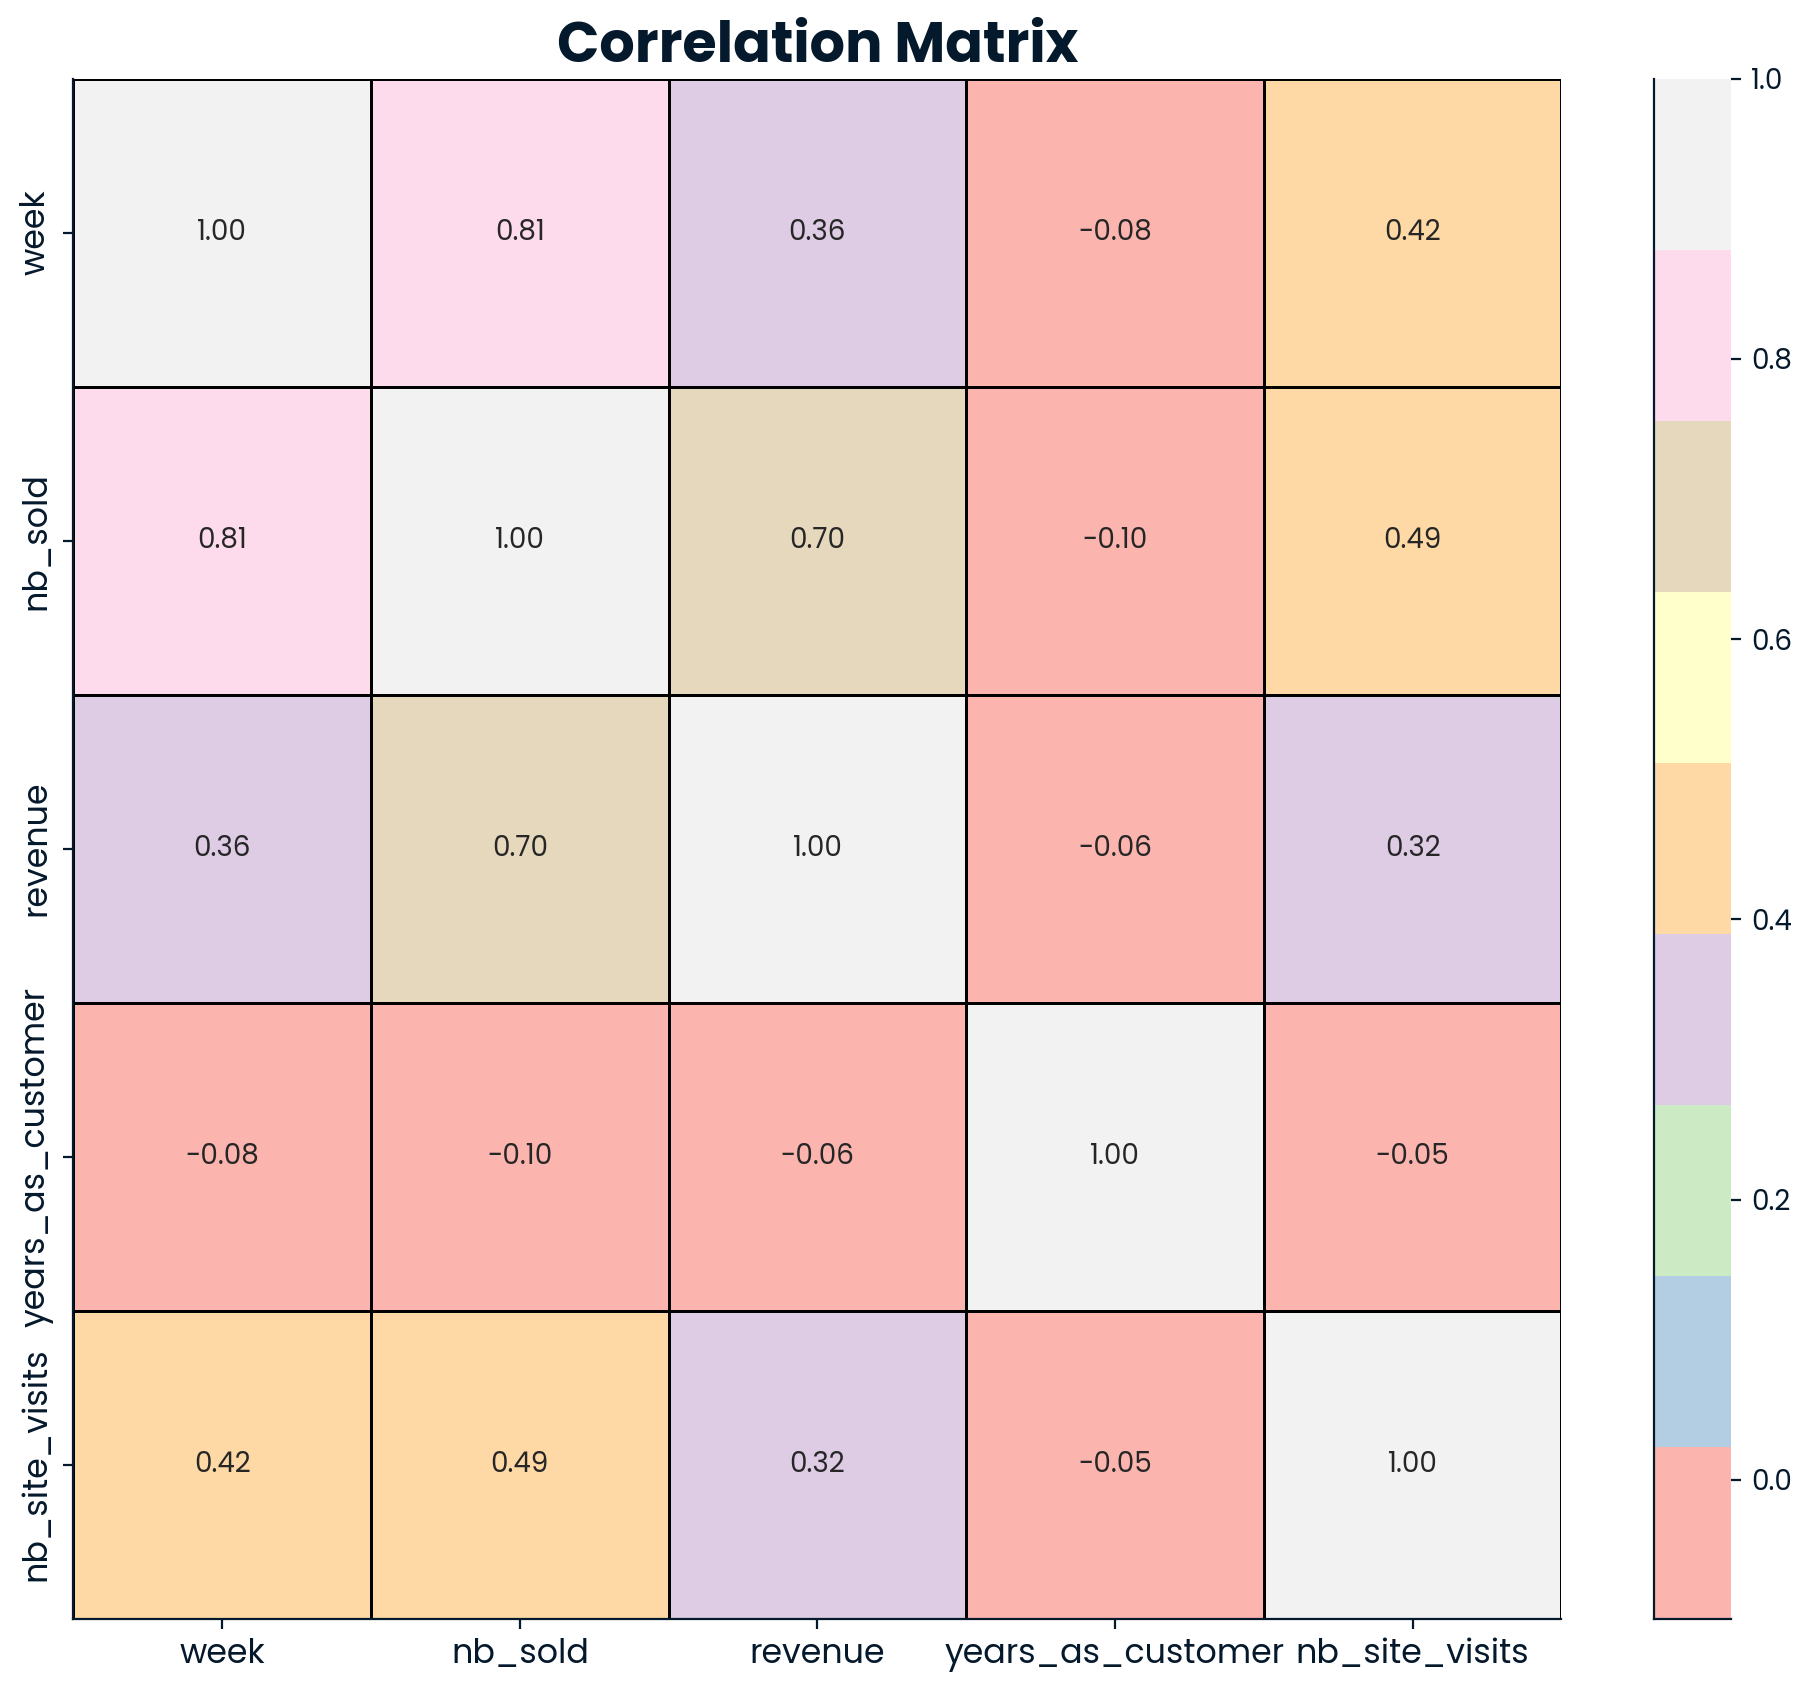

In [42]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Pastel1', fmt='.2f', linewidths=0.5, linecolor='black')
plt.title("Correlation Matrix", fontsize=20, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

**Findings:**

- The strong positive correlation between `nb_sold` and `revenue` highlighted the importance of increasing sales to boost revenue.
- The weak negative correlation between `years_as_customer` and `nb_site_visits` suggested that long-term customers may not need to visit the site as frequently.

## Pairwise Relationships by Sales Method

The matrix of scatter plots and histograms titled "Pairwise Relationships by Sales Method" shows the relationships between different variables such as `revenue`, `years_as_customer`, `nb_visits`, and `nb_sold` with respect to different sales methods like `Email + Call`, `Call` and `Email`

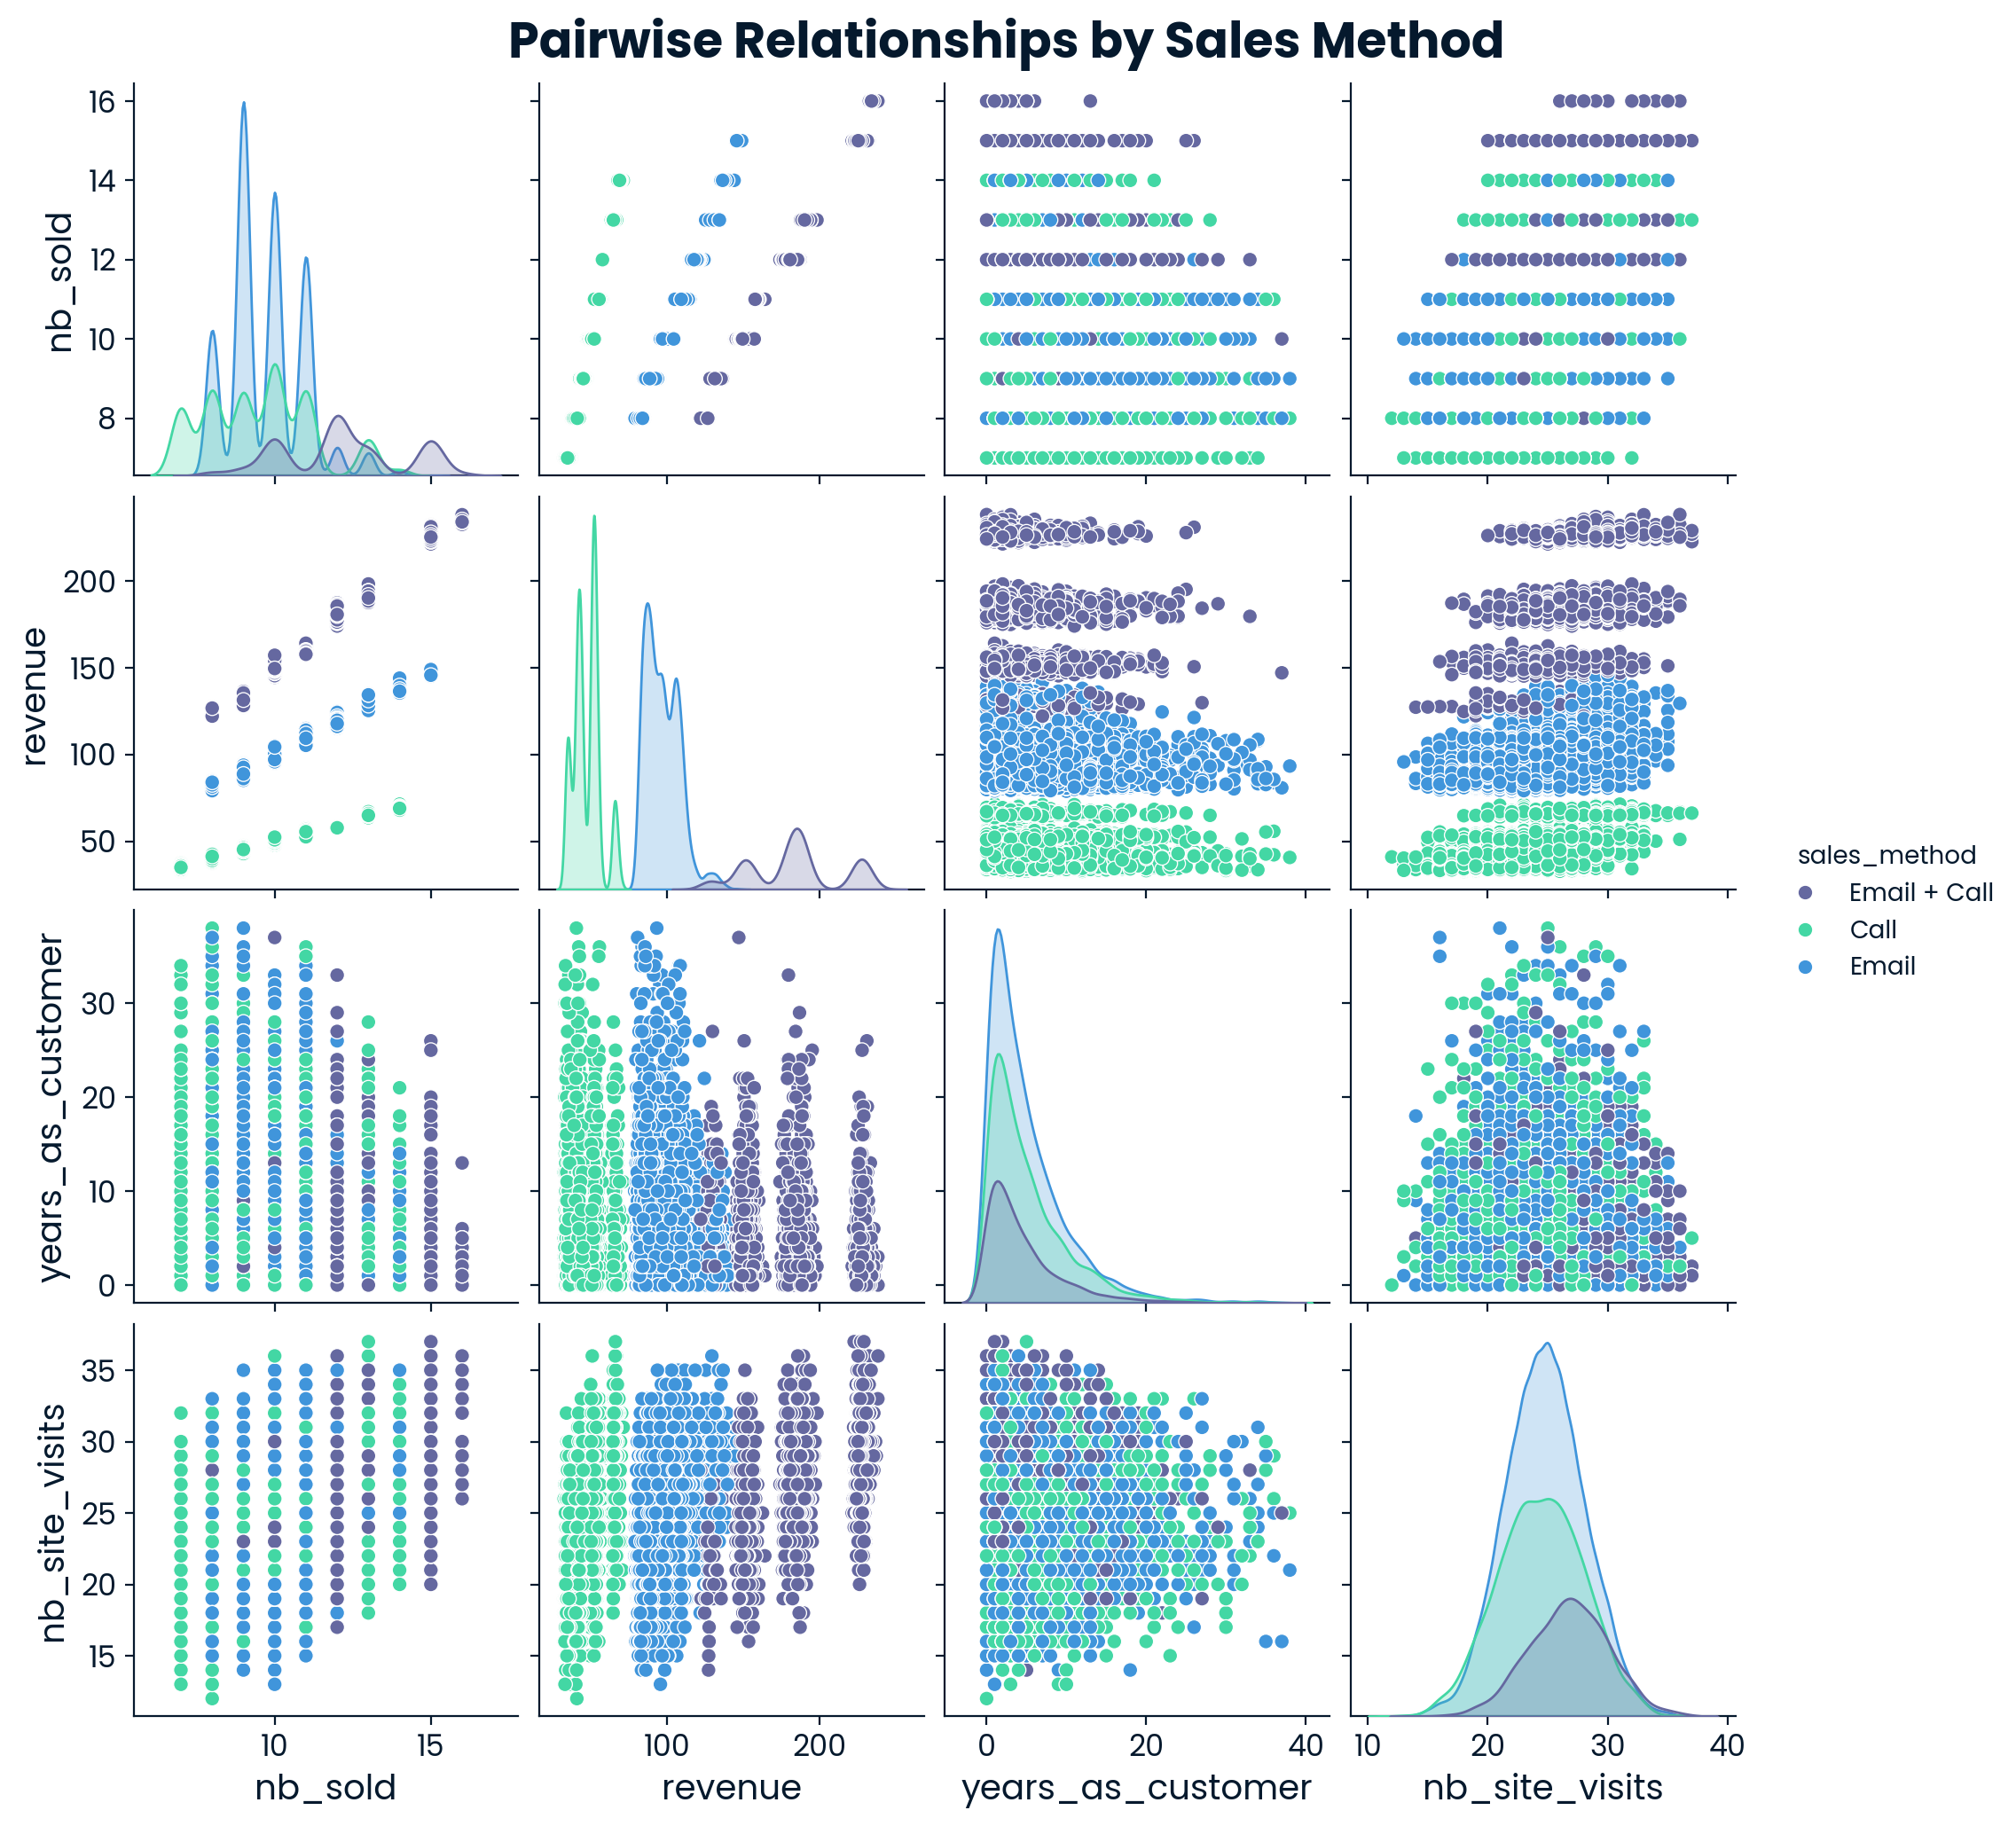

In [43]:
g = sns.pairplot(df, vars=['nb_sold', 'revenue', 'years_as_customer', 'nb_site_visits'], hue='sales_method')
g.fig.suptitle('Pairwise Relationships by Sales Method', fontsize=20, weight='bold', y=1.02)

# Set titles and labels for each subplot
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)

sns.despine()
plt.show()

**Key Insights:**
- The scatter plots helped visualize the correlations between different variables.
- The histograms showed the distribution of each variable.
- This visualization were useful for identifying patterns and relationships in the data.

In [44]:
# Extract data for each sales method
call_data = df[df['sales_method'] == 'Call']
email_data = df[df['sales_method'] == 'Email']
combo_data = df[df['sales_method'] == 'Email + Call']

# Perform pairwise t-tests for number of units sold between different sales methods
t_call_email, p_call_email = stats.ttest_ind(
    call_data['nb_sold'], email_data['nb_sold'])
t_call_combo, p_call_combo = stats.ttest_ind(
    call_data['nb_sold'], combo_data['nb_sold'])
t_email_combo, p_email_combo = stats.ttest_ind(
    email_data['nb_sold'], combo_data['nb_sold'])

# Print t-test results for number of units sold
print("Number of units sold:")
print("Call vs. Email: t = {:.3f}, p = {:.3f}".format(
    t_call_email, p_call_email))
print("Call vs. Email + Call: t = {:.3f}, p = {:.3f}".format(
    t_call_combo, p_call_combo))
print("Email vs. Email + Call: t = {:.3f}, p = {:.3f}".format(
    t_email_combo, p_email_combo))

# Perform pairwise t-tests for revenue between different sales methods
t_call_email, p_call_email = stats.ttest_ind(
    call_data['revenue'], email_data['revenue'])
t_call_combo, p_call_combo = stats.ttest_ind(
    call_data['revenue'], combo_data['revenue'])
t_email_combo, p_email_combo = stats.ttest_ind(
    email_data['revenue'], combo_data['revenue'])

# Print t-test results for revenue
print("Revenue:")
print("Call vs. Email: t = {:.3f}, p = {:.3f}".format(
    t_call_email, p_call_email))
print("Call vs. Email + Call: t = {:.3f}, p = {:.3f}".format(
    t_call_combo, p_call_combo))
print("Email vs. Email + Call: t = {:.3f}, p = {:.3f}".format(
    t_email_combo, p_email_combo))

# Perform t-test to assess relationship between years_as_customer and number of units sold
t_stat, p_val = stats.ttest_ind(
    df[df['years_as_customer'] > 0]['years_as_customer'], 
    df[df['nb_sold'] > 0]['nb_sold'])
print(f"Years as Customer vs. Units Sold: t = {t_stat:.3f}, p = {p_val:.3f}")

# Perform t-test to assess relationship between number of site visits and revenue
t_stat, p_val = stats.ttest_ind(
    df[df['nb_site_visits'] > 0]['nb_site_visits'], 
    df[df['revenue'] > 0]['revenue'])
print(f"Number of Site Visits vs. Revenue: t = {t_stat:.3f}, p = {p_val:.3f}")

Number of units sold:
Call vs. Email: t = -8.253, p = 0.000
Call vs. Email + Call: t = -58.178, p = 0.000
Email vs. Email + Call: t = -72.162, p = 0.000
Revenue:
Call vs. Email: t = -257.452, p = 0.000
Call vs. Email + Call: t = -296.692, p = 0.000
Email vs. Email + Call: t = -204.631, p = 0.000
Years as Customer vs. Units Sold: t = -100.809, p = 0.000
Number of Site Visits vs. Revenue: t = -171.127, p = 0.000


**Findings:**

The t-test results revealed significant differences in both the number of units sold and revenue across different sales methods. Specifically, the combination of 'Email + Call' consistently outperformed 'Call' and 'Email' alone in both metrics, indicating its superior effectiveness. The results also highlighted significant relationships between customer characteristics and sales performance. For instance, the number of years as a customer and the number of site visits showed strong correlations with sales metrics, suggesting that longer-term customer engagement and site activity impacted sales outcomes in notable ways.

## Number of Customers by Sales Method

The plot titled "Number of Customers by Sales Method" provides a visual comparison of the effectiveness of different sales methods in terms of customer acquisition

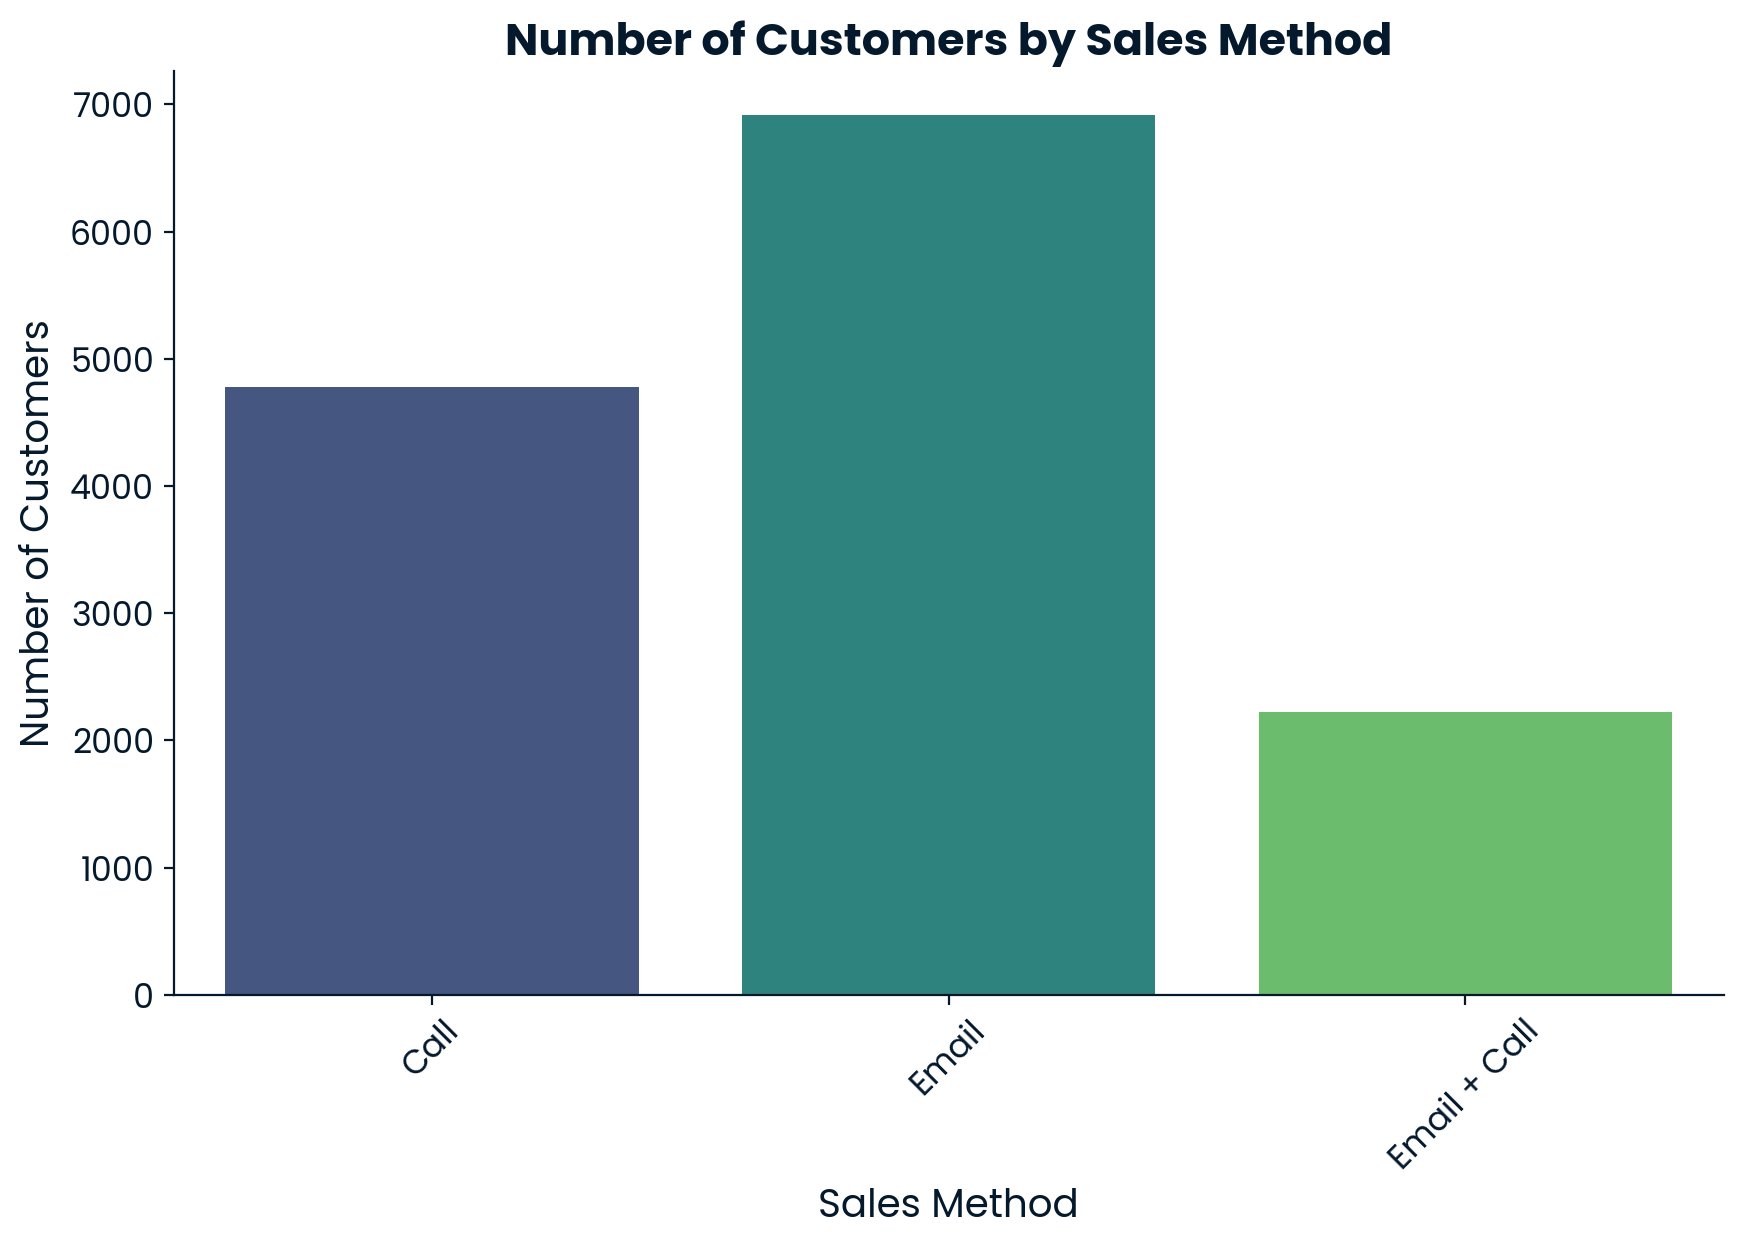

In [45]:
# Group the data by sales method and count the unique customer IDs for each group
customers_by_method = df.groupby('sales_method')['customer_id'].nunique()

# Create a bar graph of the results
plt.figure(figsize=(10, 6))
sns.barplot(x=customers_by_method.index, y=customers_by_method.values, palette='viridis')
plt.title('Number of Customers by Sales Method', fontsize=16, weight='bold')
plt.xlabel('Sales Method', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

**Findings:**

- Both “Call” and “Email” methods individually had more customers compared to the combined “Email + Call” method. This indicated that more customers were reached through these methods
- The “Email” method has a slight edge over the “Call” method.

# 3. Metric Definitions and How the Business Should Use Them

### Revenue per Sales Method

- **Definition:** Revenue per Sales Method quantifies the average revenue generated from each distinct sales approach (i.e., Call, Email, Email + Call). This metric provides insight into how effective each sales method is at driving revenue.
- **Usage:** This metric helps the business:
  - Identify Strengths and Weaknesses: By analyzing the revenue generated from different sales methods, the business can determine which methods are most effective and which need improvement.
  - Improve Sales Strategies and Training: Insights from this metric can guide the refinement of sales strategies and the development of targeted training programs for sales teams.
  - Optimize Lead Generation and Follow-Up Efforts: Understanding which methods are more successful allows the business to focus efforts on the most productive strategies, enhancing overall sales performance.


### Average Revenue per Customer (ARPC) 

- **Definition:**  Average Revenue per Customer (ARPC) measures the mean revenue generated from each customer across different sales methods. It assesses the profitability of each sales strategy by providing an average revenue figure for customers acquired through each method.
- **Usage:** 
    - Evaluate Sales Methods: By comparing ARPC values across different sales methods, the business can identify which strategies are most effective in generating revenue.
    - Allocate Resources: This metric helps in allocating marketing and sales resources more efficiently by focusing on methods with higher ARPC.
    - Budget Allocation and Performance Tracking: It aids in setting budgets and tracking performance by highlighting which sales methods deliver the best return on investment.


### Customer Lifetime Value (CLV)

- **Definition:**  Customer Lifetime Value (CLV) represents the total revenue a business can expect to earn from a customer throughout their entire relationship with the company. CLV helps in understanding the long-term value and profitability of acquiring and retaining customers.
- **Usage:** Monitoring CLV helps the business to:
  - Determine Effectiveness of Acquisition and Retention: CLV helps assess how well the business’s customer acquisition and retention strategies are performing by providing a long-term view of customer profitability.
Allocate Marketing and Sales Resources: With a clear understanding of CLV, the business can allocate marketing and sales resources more effectively, focusing efforts on acquiring and retaining high-value customers.
Set Realistic Revenue and Growth Targets: CLV provides a foundation for setting achievable revenue and growth targets by projecting future revenue based on current customer relationships.

### Revenue per Sales Method

In [46]:
# Group the data by 'sales_method' and calculate the average revenue for each method
revenue_per_sales_method = df.groupby('sales_method')['revenue'].mean()

# Create a DataFrame to display the results
revenue_df = pd.DataFrame({
    'Sales Method': revenue_per_sales_method.index,
    'Revenue per Sales Method': revenue_per_sales_method.values
})

# Format and print the DataFrame
print(revenue_df.to_string(index=False, formatters={'Revenue per Sales Method': '${:,.2f}'.format}))

Sales Method Revenue per Sales Method
        Call                   $47.60
       Email                   $97.13
Email + Call                  $183.65


The calculation of the revenue per sales method revealed distinct differences in effectiveness. Based on the data, the Email + Call method stood out with the highest average revenue of **$183.651233**, significantly surpassing the Call and Email methods. This suggested that combining both approaches is the most profitable strategy, demonstrating a higher impact on revenue generation. The business should consider prioritizing or expanding the Email + Call method to maximize revenue, while continuing to evaluate and refine the effectiveness of the other methods.

### Average Revenue per Customer (ARPC)

In [47]:
# Calculate average revenue per customer by sales method
average_revenue_per_customer = df.groupby('sales_method')['revenue'].mean()
# Create a DataFrame for the average revenue per customer
arpc_df = pd.DataFrame({
    'Sales Method': average_revenue_per_customer.index,
    'Average Revenue per Customer ($)': average_revenue_per_customer.values
})

# Round the values to 2 decimal places
arpc_df['Average Revenue per Customer ($)'] = arpc_df['Average Revenue per Customer ($)'].round(2)

# Print the DataFrame as a table
print(arpc_df.to_string(index=False))

Sales Method  Average Revenue per Customer ($)
        Call                             47.60
       Email                             97.13
Email + Call                            183.65


The calculation of Average Revenue per Customer (ARPC) for each sales method revealed important insights into the revenue generated per customer. The Email + Call method demonstrated the highest ARPC, which indicated that customers acquired through this combined approach generated more revenue on average compared to those acquired through the Call or Email-only methods.

### Customer Lifetime Value Method

In [48]:
# Calculate average revenue per customer by sales method
average_revenue_per_customer = df.groupby('sales_method')['revenue'].mean()

# Calculate average customer lifespan
average_lifespan = df['years_as_customer'].mean()

# Calculate CLV for each sales method
clv = average_revenue_per_customer * average_lifespan

# Create a DataFrame to display the results
clv_df = pd.DataFrame({
    'Sales Method': clv.index,
    'Estimated CLV': clv.values
})

# Format and print the DataFrame
print(clv_df.to_string(index=False, formatters={'Estimated CLV': '${:,.2f}'.format}))

Sales Method Estimated CLV
        Call       $236.41
       Email       $482.43
Email + Call       $912.17


The calculation of Customer Lifetime Value (CLV) by sales method highlighted notable variations in long-term profitability. The data showed that the Email + Call method had the highest CLV, indicating it delivered the greatest long-term value. Specifically, this method generated a CLV of **$ 912.17**, outperforming both the Call and Email methods. This suggested that the combined approach of Email and Call was not only more effective in terms of immediate revenue but also contributed significantly to customer retention and overall profitability. The business should consider enhancing the Email + Call strategy to further capitalize on its superior CLV, while also reviewing and optimizing the other sales methods to improve their long-term customer value.

# 4. Recommendation

Based on the analysis, I recommend that the business adopt the **"Email + Call"** sales method as the primary strategy moving forward. This method demonstrated the highest revenue generation among the three approaches while maintaining a manageable level of effort, as it combines the effectiveness of both email and phone calls.

**Rationale:**
- **Revenue Generation:** The "Email + Call" method consistently yields the highest revenue per customer.
- **Efficiency:** It requires only a relatively short call in addition to email outreach, balancing effort and results effectively.

**Business Goal Alignment:**
The goal of increasing revenue from existing customers is directly addressed by adopting this method. The data clearly indicates that the current sales methods are suboptimal for revenue generation. The "Email + Call" approach has shown significant potential for improvement in this area.

**Success Measurement:**
To assess the effectiveness of this recommendation, the business should monitor total revenue from existing customers on a monthly or quarterly basis. Comparing revenue figures before and after implementing the "Email + Call" method will provide a clear measure of its impact.

**Baseline Measurement:**
I have evaluated the revenue generated by each sales method, providing a baseline for comparison. This baseline highlights the potential improvement achievable with the "Email + Call" method.

By adopting the "Email + Call" strategy, the business can expect to see enhanced revenue generation and improved sales performance from existing customers.